Etudiants : Cazeres Mathieu (22200082), Martin-Chantereau Etienne (21909526), Moreaux Victor (22200010), Poiret Valentin (21609227)

# **Notebook pour le cas de classification True vs False vs Other vs Mixture.**

Le Notebook contient 3 parties :
- Visualisation des données 
- Classification de base avec les données 'train' et 'test'
- Classification avec nouvelles données basé sur les texts
- Classification avec nouvelles données basé sur les titres
- Double classification

---

---

*Chargement des données des fonctions utilisées dans le notebook*

In [ ]:
import sys
from google.colab import drive
drive.mount('/content/drive')
my_local_drive = "/content/drive/MyDrive/projet_ML/Projet_MachineLearning"
# fonctions utilities (affichage, confusion, etc.)
sys.path.append(my_local_drive)
# Se positionner sur le répertoire associé
%cd $my_local_drive
%pwd

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
!pip install learn
# fonctions utilities (affichage, confusion, etc.)
from Fonction.MyNLPUtilities import *
from Fonction.myFonction import *
from Fonction.AllModels import *
from Fonction.visualisation import *

# Ce code en commentaire permet de concatener les données en un seul dataframe

# Init_train = pd.read_csv('./Data_brut/HAI817_Projet_train.csv', sep=",")
# Init_test = pd.read_csv('./Data_brut/HAI817_Projet_test.csv', sep=",")
# Init_Alle = pd.read_csv('./Data_brut/data_allemand_all.csv', sep=",")
#
#
# data_brute = pd.concat([Init_train,Init_test,Init_Alle], ignore_index = True)
#
# for i in range(0,len(data_brute['our rating'])):
#  if data_brute['our rating'][i] == 'Other':
#      data_brute['our rating'][i] = 'other'
#
# data_brute = data_brute.drop_duplicates()
# print(data_brute['our rating'].value_counts())




# Ce code permet de générer des sous-échantillons équilibré  

# data_equilibre = balanceSample(data_brute,210,["false","true","mixture","other"])
# print(data_equilibre['our rating'].value_counts())
# data_equilibre.to_csv('./Data_equilibre/MyData_Sprint2.csv', sep=',', index=False)

Mounted at /content/drive
/content/drive/MyDrive/projet_ML/Projet_MachineLearning
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for learn: filename=learn-1.0.0-py3-none-any.whl size=1258 sha256=93a1562c572058af358a578852727a7cb567c2fe5d9edfc24ad0b366f5440cd5
  Stored in directory: /root/.cache/pip/wheels/15/8c/c4/db38629e6d3d6cdc65cca1dd26334ad5a0aef4f01d67be09c7
Successfully built learn


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!




---


---


# **Visualisation des données**

---


---






In [ ]:
mySample = pd.read_csv('./Data_equilibre/MyData_Sprint1et2.csv', sep=",")
print(mySample['our rating'].value_counts())
X_train = mySample['text']
y_train = mySample['our rating']

false      210
true       210
mixture    210
other      210
Name: our rating, dtype: int64




---
**L'analyse T-SNE (t-Distributed Stochastic Neighbor Embedding)**


---





In [ ]:
myTSNE_2d_3d(X_train,y_train)

*La proximité des centroïdes des différentes classes dans l'espace créé par T-SNE peut annoncer une certaine difficulté pour la classification. En effet, si les différentes classes sont très proches les unes des autres, cela peut rendre difficile pour un algorithme de classification de les distinguer avec précision.*

---


---



# **Sprint 1 : Classification avec les données 'train' et 'test'.**



---



---




In [ ]:
mySample = pd.read_csv('./Data_equilibre/MyData_Sprint1.csv', sep=",")
print(mySample['our rating'].value_counts())
X_train = mySample['text']
y_train = mySample['our rating']

false      150
true       150
mixture    150
other      150
Name: our rating, dtype: int64


[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Evaluation de  MultinomialNB
MultinomialNB : 0.452 (0.037) in 0.910 s
Evaluation de  LR
LR : 0.472 (0.042) in 25.055 s
Evaluation de  KNN
KNN : 0.342 (0.046) in 4.372 s
Evaluation de  CART
CART : 0.338 (0.091) in 10.399 s
Evaluation de  RF
RF : 0.457 (0.044) in 17.574 s
Evaluation de  SVM
SVM : 0.467 (0.047) in 94.850 s

Le meilleur resultat : 
Classifier :  LR  accuracy : 0.472  (0.042)  en 25.055   s

Tous les résultats : 

Classifier :  LR  accuracy : 0.472  (0.042)  en 25.055   s
Classifier :  SVM  accuracy : 0.467  (0.047)  en 94.850   s
Classifier :  RF  accuracy : 0.457  (0.044)  en 17.574   s
Classifier :  MultinomialNB  accuracy : 0.452  (0.037)  en 0.910   s
Classifier :  KNN  accuracy : 0.342  (0.046)  en 4.372   s
Classifier :  CART  accuracy : 0.338  (0.091)  en 10.399   s


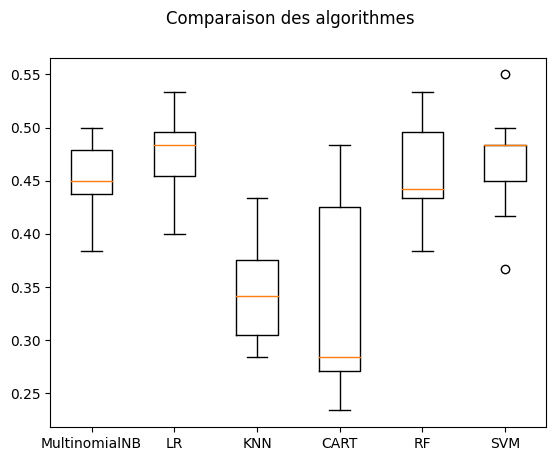

In [ ]:
testAllModel(X_train,y_train,3)

-> Les modèles SVM, LR, RF et MNB sont les plus performants. Pour chacun de ces modèles, nous allons chercher les meilleurs paramètrages de prétraitement et les meilleurs paramètrages du modèle.







---
Modèle SVM (Support Vector Machine)

---




In [ ]:
testSVC(X_train, y_train,3,"./Data_parametrage/data_svm_mathieu_0")

Application de gridsearch ...
pipeline : ['cleaner', 'tfidf', 'svm']
parameters :
{'cleaner__removedigit': [True, False], 'cleaner__getlemmatisation': [True, False], 'tfidf__stop_words': ['english', None], 'tfidf__lowercase': [True, False], 'svm__C': [0.001, 0.01, 0.1, 1, 10], 'svm__gamma': [0.001, 0.01, 0.1, 1], 'svm__kernel': ['linear', 'rbf', 'poly', 'sigmoid']}
Fitting 3 folds for each of 1280 candidates, totalling 3840 fits


[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


réalisé en  748.152 s
Meilleur résultat : 0.472
Ensemble des meilleurs paramètres :
	cleaner__getlemmatisation: False
	cleaner__removedigit: False
	svm__C: 10
	svm__gamma: 1
	svm__kernel: 'rbf'
	tfidf__lowercase: True
	tfidf__stop_words: None

Les premiers résultats : 
       cleaner__getlemmatisation  cleaner__removedigit  svm__C  svm__gamma  \
1269                      False                 False    10.0        1.00   
631                        True                 False    10.0        1.00   
1261                      False                 False    10.0        0.10   
1169                      False                 False     1.0        0.01   
295                        True                  True    10.0        0.10   

     svm__kernel  tfidf__lowercase tfidf__stop_words  accuracy  
1269         rbf              True              None  0.471667  
631          rbf             False              None  0.468333  
1261     sigmoid              True              None  0.465000  
1169  

Enregistrement du modèle

Sauvegarde du modèle dans  ./Modele/final/Svm_final_0.pkl
Chargement du modèle 

Pipeline(steps=[('cleaner', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('svm', SVC(C=10, gamma=1))])
Accuracy : 0.483
Classification Report
              precision    recall  f1-score   support

       false    0.64286   0.60000   0.62069        15
     mixture    0.33333   0.46667   0.38889        15
       other    0.66667   0.13333   0.22222        15
        true    0.50000   0.73333   0.59459        15

    accuracy                        0.48333        60
   macro avg    0.53571   0.48333   0.45660        60
weighted avg    0.53571   0.48333   0.45660        60



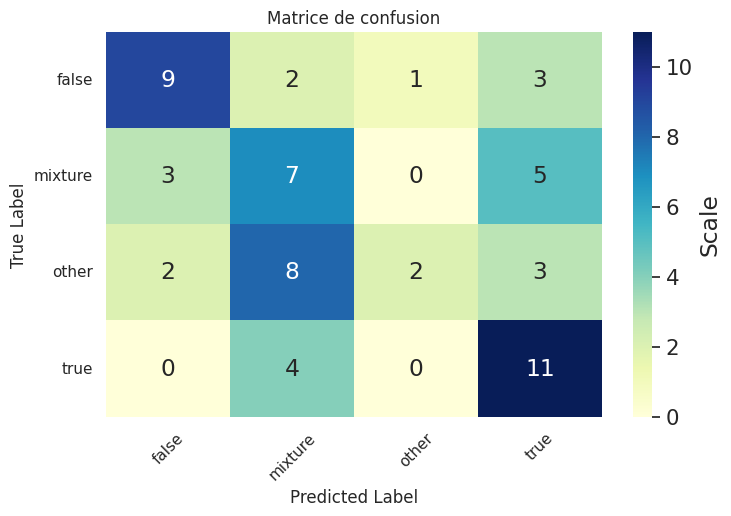

In [ ]:
from sklearn.model_selection import train_test_split
import pickle
# Création d'un jeu d'apprentissage et de test
trainsize=0.9 
testsize= 0.1
seed=30

train_title,test_title,train_note,test_note=train_test_split(X_train,y_train, train_size=trainsize,random_state=seed,test_size=testsize,stratify=y_train)

pipeline=Pipeline([
    ("cleaner", TextNormalizer(removedigit=False, getlemmatisation=False)),
    ("tfidf", TfidfVectorizer(lowercase=True, stop_words=None)),
    ('svm', SVC(C=10, gamma=1, kernel='rbf'))
])
pipeline.fit(train_title,train_note)
filename='./Modele/TruevsFalsevsMixturevsOther/Svm_final_0.pkl'
print("Sauvegarde du modèle dans ", filename)
pickle.dump(pipeline, open(filename, "wb"))

print ("Chargement du modèle \n")
# le chargement se fait via la fonction load
clf_loaded = pickle.load(open(filename, 'rb'))
# affichage du modèle sauvegardé
print (clf_loaded)


# test  
y_pred = clf_loaded.predict(test_title)
# autres mesures et matrice de confusion
MyshowAllScores(test_note,y_pred)


---
Modèle RFC (RandomForestClassifier)


---

In [ ]:
testRFC(X_train, y_train,3,"./Data_parametrage/data_rfc_mathieu_0")

Application de gridsearch ...
pipeline : ['cleaner', 'tfidf', 'rfc']
parameters :
{'cleaner__removedigit': [True, False], 'cleaner__getlemmatisation': [True, False], 'tfidf__stop_words': ['english', None], 'tfidf__lowercase': [True, False], 'rfc__n_estimators': [500, 1200], 'rfc__max_depth': [25, 30], 'rfc__min_samples_split': [5, 10, 15], 'rfc__min_samples_leaf': [1, 2]}
Fitting 3 folds for each of 384 candidates, totalling 1152 fits
réalisé en  354.906 s
Meilleur résultat : 0.483
Ensemble des meilleurs paramètres :
	cleaner__getlemmatisation: False
	cleaner__removedigit: True
	rfc__max_depth: 30
	rfc__min_samples_leaf: 1
	rfc__min_samples_split: 5
	rfc__n_estimators: 500
	tfidf__lowercase: True
	tfidf__stop_words: None

Les premiers résultats : 
      cleaner__getlemmatisation  cleaner__removedigit  rfc__max_depth  \
267                      False                  True              30   
241                      False                  True              30   
199                      

Sauvegarde du modèle dans  ./Modele/final/Rfc_final_0.pkl
Chargement du modèle 

Pipeline(steps=[('cleaner', TextNormalizer(removedigit=True)),
                ('tfidf', TfidfVectorizer(lowercase=False)),
                ('rfc',
                 RandomForestClassifier(max_depth=30, min_samples_leaf=2,
                                        min_samples_split=5,
                                        n_estimators=500))])
Accuracy : 0.467
Classification Report
              precision    recall  f1-score   support

       false    0.55000   0.73333   0.62857        15
     mixture    0.35714   0.33333   0.34483        15
       other    0.66667   0.26667   0.38095        15
        true    0.40000   0.53333   0.45714        15

    accuracy                        0.46667        60
   macro avg    0.49345   0.46667   0.45287        60
weighted avg    0.49345   0.46667   0.45287        60



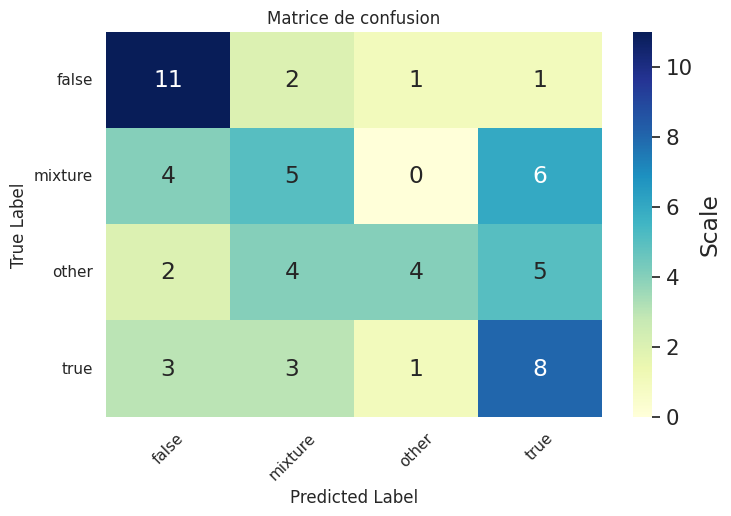

In [ ]:
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
# Création d'un jeu d'apprentissage et de test
trainsize=0.9 
testsize= 0.1
seed=30
train_title,test_title,train_note,test_note=train_test_split(X_train,y_train, train_size=trainsize,random_state=seed,test_size=testsize,stratify=y_train)  # stratified = yes

## double classification a regarder
pipeline=Pipeline([
    ("cleaner", TextNormalizer(removedigit=True, getlemmatisation=False)),
    ("tfidf", TfidfVectorizer(lowercase=False, stop_words=None)),
    ('rfc', RandomForestClassifier(max_depth=30,min_samples_leaf=2, min_samples_split=5, n_estimators=500))
])
pipeline.fit(train_title,train_note)
filename='./Modele/TruevsFalsevsMixturevsOther/Rfc_final_0.pkl'
print("Sauvegarde du modèle dans ", filename)
pickle.dump(pipeline, open(filename, "wb"))

print ("Chargement du modèle \n")
# le chargement se fait via la fonction load
clf_loaded = pickle.load(open(filename, 'rb'))
# affichage du modèle sauvegardé
print (clf_loaded)

# test  
y_pred = clf_loaded.predict(test_title)
# autres mesures et matrice de confusion
MyshowAllScores(test_note,y_pred)




---
Modèle LR (LogisticRegression)


---



In [ ]:
testLR(X_train, y_train,3,'./Data_parametrage/data_lr_mathieu_0')

Application de gridsearch ...
pipeline : ['cleaner', 'tfidf', 'lr']
parameters :
{'cleaner__removedigit': [True, False], 'cleaner__getlemmatisation': [True, False], 'tfidf__stop_words': ['english', None], 'tfidf__lowercase': [True, False], 'lr__solver': ['newton-cg', 'lbfgs', 'liblinear'], 'lr__penalty': ['l2'], 'lr__C': [100, 10, 1.0, 0.1, 0.01]}
Fitting 3 folds for each of 240 candidates, totalling 720 fits
réalisé en  130.970 s
Meilleur résultat : 0.470
Ensemble des meilleurs paramètres :
	cleaner__getlemmatisation: True
	cleaner__removedigit: True
	lr__C: 10
	lr__penalty: 'l2'
	lr__solver: 'liblinear'
	tfidf__lowercase: False
	tfidf__stop_words: None

Les premiers résultats : 
      cleaner__getlemmatisation  cleaner__removedigit  lr__C lr__penalty  \
23                        True                  True   10.0          l2   
83                        True                 False   10.0          l2   
199                      False                 False   10.0          l2   
195      

Sauvegarde du modèle dans  ./Modele/final/Lr_final_0.pkl
Chargement du modèle 

Pipeline(steps=[('cleaner',
                 TextNormalizer(getlemmatisation=True, removedigit=True)),
                ('tfidf', TfidfVectorizer(lowercase=False)),
                ('lr', LogisticRegression(C=10, solver='liblinear'))])
Accuracy : 0.467
Classification Report
              precision    recall  f1-score   support

       false    0.55556   0.66667   0.60606        15
     mixture    0.37500   0.40000   0.38710        15
       other    0.42857   0.20000   0.27273        15
        true    0.47368   0.60000   0.52941        15

    accuracy                        0.46667        60
   macro avg    0.45820   0.46667   0.44882        60
weighted avg    0.45820   0.46667   0.44882        60



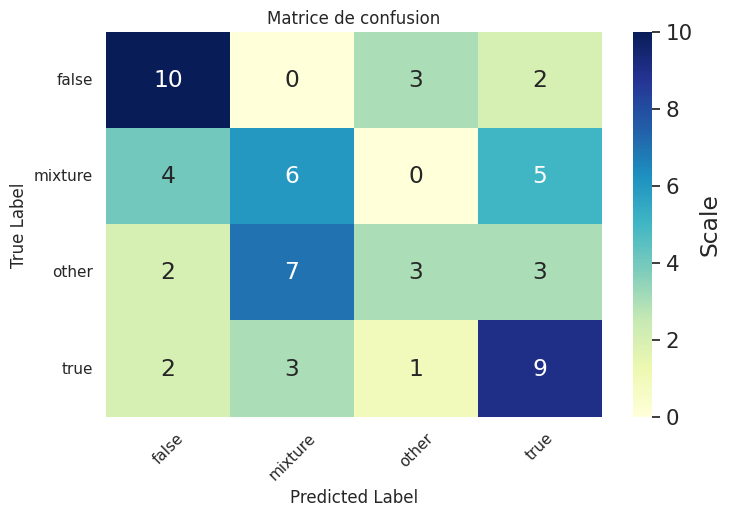

In [ ]:
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# Création d'un jeu d'apprentissage et de test
trainsize=0.9
testsize= 0.1
seed=30
train_title,test_title,train_note,test_note=train_test_split(X_train,y_train, train_size=trainsize,random_state=seed,test_size=testsize,stratify=y_train)

pipeline=Pipeline([
    ("cleaner", TextNormalizer(removedigit=True, getlemmatisation=True)),
    ("tfidf", TfidfVectorizer(lowercase=False, stop_words=None)),
    ('lr', LogisticRegression(C=10,penalty='l2', solver='liblinear'))
])
pipeline.fit(train_title,train_note)
filename='./Modele/TruevsFalsevsMixturevsOther/Lr_final_0.pkl'
print("Sauvegarde du modèle dans ", filename)
pickle.dump(pipeline, open(filename, "wb"))

print ("Chargement du modèle \n")
# le chargement se fait via la fonction load
clf_loaded = pickle.load(open(filename, 'rb'))
# affichage du modèle sauvegardé
print (clf_loaded)
# test 
y_pred = clf_loaded.predict(test_title)
# autres mesures et matrice de confusion
MyshowAllScores(test_note,y_pred)

---

Modèle MNB (MultinomialNB)



---

In [ ]:
testMNB(X_train, y_train,3,'./Data_parametrage/data_mnb_mathieu_0')

Application de gridsearch ...
pipeline : ['cleaner', 'tfidf', 'mnb']
parameters :
{'cleaner__removedigit': [True, False], 'cleaner__getlemmatisation': [True, False], 'tfidf__stop_words': ['english', None], 'tfidf__lowercase': [True, False], 'mnb__alpha': array([0.5, 0.7, 0.9, 1.1, 1.3, 1.5]), 'mnb__fit_prior': [True, False], 'mnb__force_alpha': [True, False]}
Fitting 3 folds for each of 384 candidates, totalling 1152 fits
réalisé en  181.284 s
Meilleur résultat : 0.468
Ensemble des meilleurs paramètres :
	cleaner__getlemmatisation: False
	cleaner__removedigit: False
	mnb__alpha: 0.5
	mnb__fit_prior: True
	mnb__force_alpha: True
	tfidf__lowercase: True
	tfidf__stop_words: None

Les premiers résultats : 
      cleaner__getlemmatisation  cleaner__removedigit  mnb__alpha  \
289                      False                 False         0.5   
301                      False                 False         0.5   
297                      False                 False         0.5   
293            

Sauvegarde du modèle dans  ./Modele/final/Mnb_final_0.pkl
Chargement du modèle 

Pipeline(steps=[('cleaner', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('mnb', MultinomialNB(alpha=0.5, force_alpha=True))])
Accuracy : 0.450
Classification Report
              precision    recall  f1-score   support

       false    0.53333   0.53333   0.53333        15
     mixture    0.44444   0.26667   0.33333        15
       other    0.66667   0.13333   0.22222        15
        true    0.39394   0.86667   0.54167        15

    accuracy                        0.45000        60
   macro avg    0.50960   0.45000   0.40764        60
weighted avg    0.50960   0.45000   0.40764        60



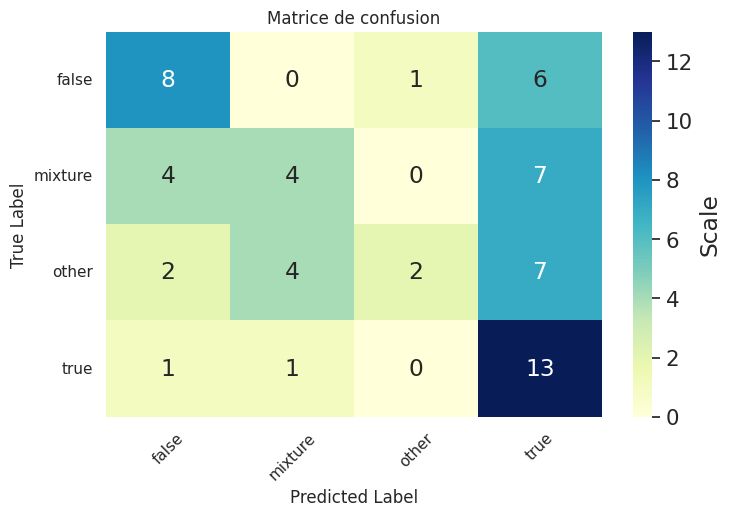

In [ ]:
import pickle
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
# Création d'un jeu d'apprentissage et de test
trainsize=0.9 
testsize= 0.1
seed=30
train_title,test_title,train_note,test_note=train_test_split(X_train,y_train, train_size=trainsize,random_state=seed,test_size=testsize,stratify=y_train)

pipeline=Pipeline([
    ("cleaner", TextNormalizer(removedigit=False, getlemmatisation=False)),
    ("tfidf", TfidfVectorizer(lowercase=True, stop_words=None)),
    ('mnb', MultinomialNB(alpha=0.5, fit_prior=True, force_alpha=True))
])
pipeline.fit(train_title,train_note)
filename='./Modele/TruevsFalsevsMixturevsOther/Mnb_final_0.pkl'
print("Sauvegarde du modèle dans ", filename)
pickle.dump(pipeline, open(filename, "wb"))
print ("Chargement du modèle \n")
# le chargement se fait via la fonction load
clf_loaded = pickle.load(open(filename, 'rb'))
# affichage du modèle sauvegardé
print (clf_loaded)
# test 
y_pred = clf_loaded.predict(test_title)
# autres mesures et matrice de confusion
MyshowAllScores(test_note,y_pred)




---


---



# **Sprint 2 : Classification avec nouvelles données basé sur les texts**



---



---



In [ ]:
mySample = pd.read_csv('./Data_equilibre/MyData_Sprint1et2.csv', sep=",")
print(mySample['our rating'].value_counts())
X_train = mySample['text']
y_train = mySample['our rating']

false      210
true       210
mixture    210
other      210
Name: our rating, dtype: int64


Etape 1 : tester plusieurs modèles différents afin d'identifier 2 ou 3 modèles 
a ajuster 


[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Evaluation de  MultinomialNB
MultinomialNB : 0.487 (0.057) in 1.100 s
Evaluation de  LR
LR : 0.532 (0.053) in 33.233 s
Evaluation de  KNN
KNN : 0.411 (0.046) in 2.834 s
Evaluation de  CART
CART : 0.437 (0.057) in 17.225 s
Evaluation de  RF
RF : 0.487 (0.048) in 22.126 s
Evaluation de  SVM
SVM : 0.543 (0.051) in 88.671 s

Le meilleur resultat : 
Classifier :  SVM  accuracy : 0.543  (0.051)  en 88.671   s

Tous les résultats : 

Classifier :  SVM  accuracy : 0.543  (0.051)  en 88.671   s
Classifier :  LR  accuracy : 0.532  (0.053)  en 33.233   s
Classifier :  MultinomialNB  accuracy : 0.487  (0.057)  en 1.100   s
Classifier :  RF  accuracy : 0.487  (0.048)  en 22.126   s
Classifier :  CART  accuracy : 0.437  (0.057)  en 17.225   s
Classifier :  KNN  accuracy : 0.411  (0.046)  en 2.834   s


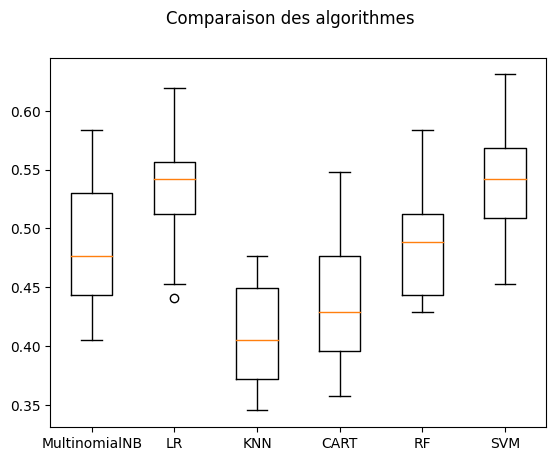

In [ ]:
testAllModel(X_train,y_train,3)

-> Les modèles SVM, LR, RF et MNB sont les plus performants. Pour chacun de ces modèles, nous allons chercher les meilleurs paramètrages de prétraitement et les meilleurs paramètrages du modèle.







---
Modèle SVM (Support Vector Machine)

---




In [ ]:
testSVC(X_train, y_train,3,"./Data_parametrage/data_svm_mathieu_1")

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Application de gridsearch ...
pipeline : ['cleaner', 'tfidf', 'svm']
parameters :
{'cleaner__removedigit': [True, False], 'cleaner__getlemmatisation': [True, False], 'tfidf__stop_words': ['english', None], 'tfidf__lowercase': [True, False], 'svm__C': [0.001, 0.01, 0.1, 1, 10], 'svm__gamma': [0.001, 0.01, 0.1, 1], 'svm__kernel': ['linear', 'rbf', 'poly', 'sigmoid']}
Fitting 3 folds for each of 1280 candidates, totalling 3840 fits
réalisé en  1045.372 s
Meilleur résultat : 0.540
Ensemble des meilleurs paramètres :
	cleaner__getlemmatisation: False
	cleaner__removedigit: False
	svm__C: 10
	svm__gamma: 0.1
	svm__kernel: 'rbf'
	tfidf__lowercase: False
	tfidf__stop_words: None

Les premiers résultats : 
       cleaner__getlemmatisation  cleaner__removedigit  svm__C  svm__gamma  \
1255                      False                 False    10.0        0.10   
935                       False                  True    10.0        0.10   
620                        True                 False    10.0

Affichage des points de rupture sur la courbe et de la proportion de certains paramètres pour chaque segment :

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 17.1 MB/s eta 0:00:00


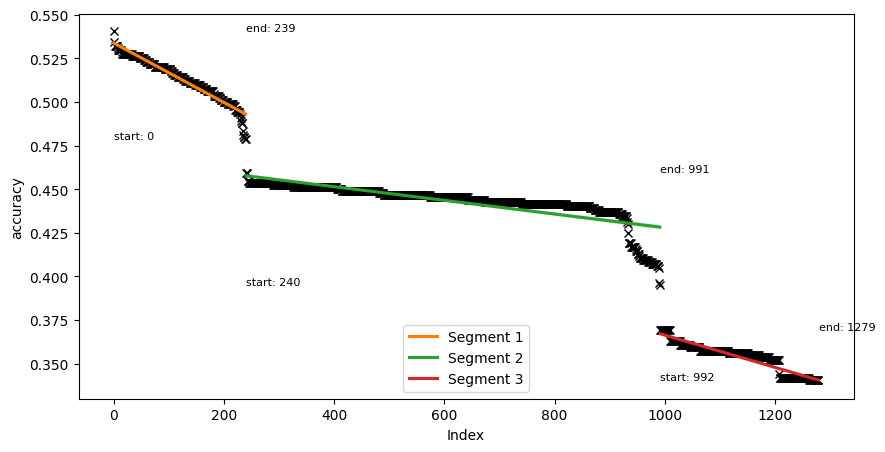

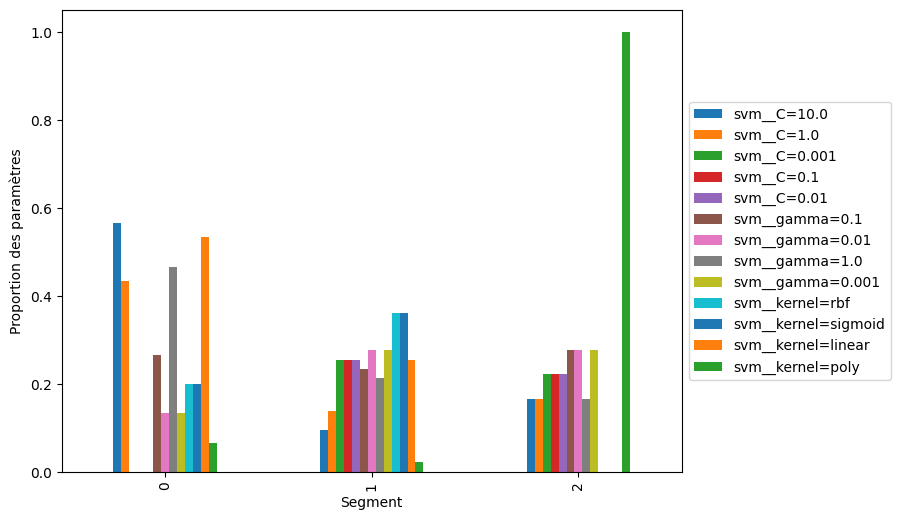

In [ ]:
from matplotlib import patches
from numpy import NaN
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
!pip install ruptures
import ruptures as rpt

# Charger les données
data = pd.read_csv('./Data_parametrage/data_svm_mathieu_1.csv')
data.fillna('vide', inplace=True)

# Sélectionner les colonnes à analyser
y_colonne = 'accuracy'

# Choix du modèle pour trouver les points de ruptures
signal = data[y_colonne].values
model = "l2"
algo = rpt.Window(width=40, model=model, jump=1).fit(signal)
result = algo.predict(n_bkps=2)

fig, ax = plt.subplots(figsize=(10, 5))

# Choix des paramètre a garder pour l'analyse de répartition
# params = ["cleaner__getlemmatisation","cleaner__removedigit",'tfidf__lowercase','tfidf__stop_words']
params = ['svm__C','svm__gamma','svm__kernel']


# Creation d'un dataFrame pour enregistrer les  paramètre de chaque modèle
l = []
for param in params:
  p = data[param].value_counts(normalize=True)
  for i in range(len(p)):
    x = p.index.tolist()[i]
    l.append(str(param)+"="+str(x))
mydf = pd.DataFrame(columns=l,index=[0, 1, 2])

# Ajouter tout les point qui corresponde a l'accuracy
ax.plot(data.index, data[y_colonne], 'x', color='black')

my_row=[]
for i, (start, end) in enumerate(zip([0] + result, result + [len(signal)])):
    segment = data.iloc[start:end]
    # Calcul de la proportion de chaque parametre dans chaque sous groupe
    param_props = []
    for param in params:
        param_value_counts = segment[param].value_counts(normalize=True)
        param_value_props = [f"{count*100:.2f}%" for count in param_value_counts]
        param_value_legend = " / ".join([f"{param}={param_value} ({param_value_props[j]})" for j, param_value in enumerate(param_value_counts.index)])
        param_props.append(param_value_legend)

        # Pour creer mon dataframe avec les paramètres
        for j, param_value in enumerate(param_value_counts.index):
          k=str(param)+"="+str(param_value)
          param_value_counts_df = param_value_counts.reset_index()
          param_value_counts_df = param_value_counts_df.rename(columns={param: 'Parametre', 0: 'Pourcentage'})
          mydf.loc[i][k]=param_value_counts_df.loc[j, 'Parametre']
        
    # joindre la legende
    segment_legend = " / ".join(param_props)
    
    # ajouter la droite de regression
    sns.regplot(x=segment.index, y=y_colonne, data=segment, ax=ax, color=f'C{i+1}', 
                label=f'Segment {i+1}', scatter=False)
    
    # afficher le début et la fin de chaque segment 
    if(start != len(data[y_colonne])):
        ax.text(start, segment[y_colonne].min(), f'start: {start}', fontsize=8)
        if start not in my_row: 
            my_row.append(start)
    if(end-1 != len(data[y_colonne])):
        ax.text(end, segment[y_colonne].max(), f'end: {end-1}', fontsize=8)
        if end-1 not in my_row: 
            my_row.append(end-1)
      

# Mise en page de la figure
ax.set_xlabel('Index')
ax.set_ylabel(y_colonne)
ax.legend(loc='lower center', ncol=1)
plt.show()
fig.savefig('data_svm_mathieu_1_tot.png', dpi=300, bbox_inches='tight')

# créer le graphique
fig, ax = plt.subplots(figsize=(8, 6))
mydf.plot(kind='bar', ax=ax)

# ajouter des étiquettes
ax.set_xlabel('Segment')
ax.set_ylabel('Proportion des paramètres')
legend = ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# afficher le graphique
plt.show()

Enregistrement du modele SVC avec les meilleurs paramètres


Sauvegarde du modèle dans  ./Modele/final/Svm_final_1.pkl
Chargement du modèle 

Pipeline(steps=[('cleaner', TextNormalizer()),
                ('tfidf', TfidfVectorizer(lowercase=False)),
                ('svm', SVC(C=10, gamma=0.1))])
Accuracy : 0.464
Classification Report
              precision    recall  f1-score   support

       false    0.47619   0.47619   0.47619        21
     mixture    0.36364   0.38095   0.37209        21
       other    0.66667   0.47619   0.55556        21
        true    0.42308   0.52381   0.46809        21

    accuracy                        0.46429        84
   macro avg    0.48239   0.46429   0.46798        84
weighted avg    0.48239   0.46429   0.46798        84



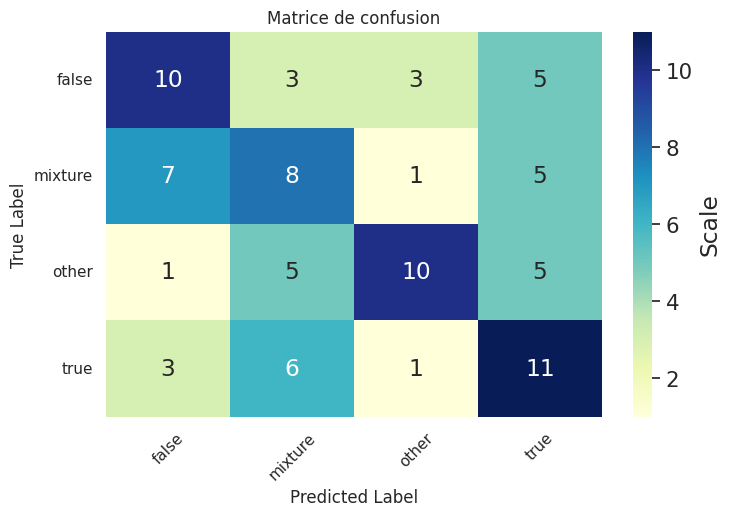

In [ ]:
from sklearn.model_selection import train_test_split
import pickle
# Création d'un jeu d'apprentissage et de test
trainsize=0.9 
testsize= 0.1
seed=30

train_title,test_title,train_note,test_note=train_test_split(X_train,y_train, train_size=trainsize,random_state=seed,test_size=testsize,stratify=y_train)

pipeline=Pipeline([
    ("cleaner", TextNormalizer(removedigit=False, getlemmatisation=False)),
    ("tfidf", TfidfVectorizer(lowercase=False, stop_words=None)),
    ('svm', SVC(C=10, gamma=0.1, kernel='rbf'))
])
pipeline.fit(train_title,train_note)
filename='./Modele/TruevsFalsevsMixturevsOther/Svm_final_1.pkl'
print("Sauvegarde du modèle dans ", filename)
pickle.dump(pipeline, open(filename, "wb"))


print ("Chargement du modèle \n")
# le chargement se fait via la fonction load
clf_loaded = pickle.load(open(filename, 'rb'))
# affichage du modèle sauvegardé
print (clf_loaded)


# test  
y_pred = clf_loaded.predict(test_title)
# autres mesures et matrice de confusion
MyshowAllScores(test_note,y_pred)



---
Modèle RFC (RandomForestClassifier)


---




In [ ]:
testRFC(X_train, y_train,3,"./Data_parametrage/data_rfc_mathieu_1")

Application de gridsearch ...
pipeline : ['cleaner', 'tfidf', 'rfc']
parameters :
{'cleaner__removedigit': [True, False], 'cleaner__getlemmatisation': [True, False], 'tfidf__stop_words': ['english', None], 'tfidf__lowercase': [True, False], 'rfc__n_estimators': [500, 1200], 'rfc__max_depth': [25, 30], 'rfc__min_samples_split': [5, 10, 15], 'rfc__min_samples_leaf': [1, 2]}
Fitting 3 folds for each of 384 candidates, totalling 1152 fits
réalisé en  506.813 s
Meilleur résultat : 0.517
Ensemble des meilleurs paramètres :
	cleaner__getlemmatisation: False
	cleaner__removedigit: False
	rfc__max_depth: 25
	rfc__min_samples_leaf: 1
	rfc__min_samples_split: 15
	rfc__n_estimators: 500
	tfidf__lowercase: False
	tfidf__stop_words: None

Les premiers résultats : 
      cleaner__getlemmatisation  cleaner__removedigit  rfc__max_depth  \
307                      False                 False              25   
184                       True                 False              30   
336                   

Enregistrement du modele RFC avec les meilleurs paramètres


Sauvegarde du modèle dans  ./Modele/final/Rfc_final_1.pkl
Chargement du modèle 

Pipeline(steps=[('cleaner', TextNormalizer()),
                ('tfidf',
                 TfidfVectorizer(lowercase=False, stop_words='english')),
                ('rfc',
                 RandomForestClassifier(max_depth=30, min_samples_leaf=2,
                                        min_samples_split=10,
                                        n_estimators=500))])
Accuracy : 0.440
Classification Report
              precision    recall  f1-score   support

       false    0.52381   0.52381   0.52381        21
     mixture    0.34615   0.42857   0.38298        21
       other    0.52632   0.47619   0.50000        21
        true    0.38889   0.33333   0.35897        21

    accuracy                        0.44048        84
   macro avg    0.44629   0.44048   0.44144        84
weighted avg    0.44629   0.44048   0.44144        84



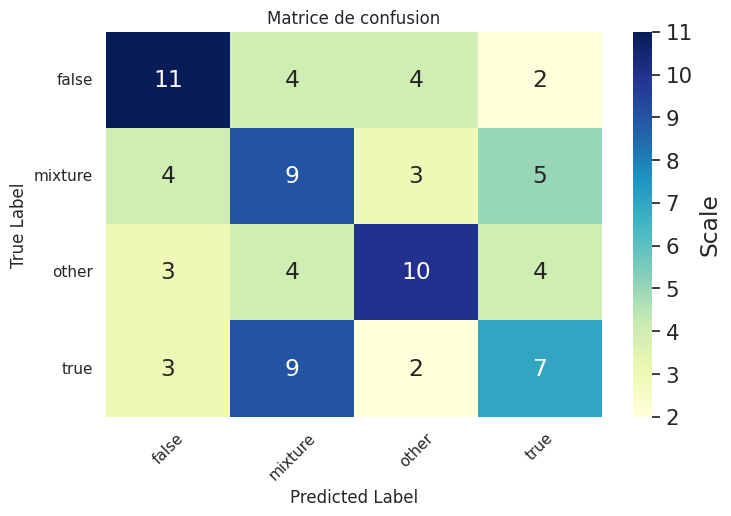

In [ ]:
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
# Création d'un jeu d'apprentissage et de test
trainsize=0.9 
testsize= 0.1
seed=30
train_title,test_title,train_note,test_note=train_test_split(X_train,y_train, train_size=trainsize,random_state=seed,test_size=testsize,stratify=y_train)  # stratified = yes

## double classification a regarder
pipeline=Pipeline([
    ("cleaner", TextNormalizer(removedigit=False, getlemmatisation=False)),
    ("tfidf", TfidfVectorizer(lowercase=False, stop_words='english')),
    ('rfc', RandomForestClassifier(max_depth=30,min_samples_leaf=2, min_samples_split=10, n_estimators=500))
])
pipeline.fit(train_title,train_note)
filename='./Modele/TruevsFalsevsMixturevsOther/Rfc_final_1.pkl'
print("Sauvegarde du modèle dans ", filename)
pickle.dump(pipeline, open(filename, "wb"))

print ("Chargement du modèle \n")
# le chargement se fait via la fonction load
clf_loaded = pickle.load(open(filename, 'rb'))
# affichage du modèle sauvegardé
print (clf_loaded)

# test  
y_pred = clf_loaded.predict(test_title)
# autres mesures et matrice de confusion
MyshowAllScores(test_note,y_pred)



---
Modèle LR (LogisticRegression)


---





In [ ]:
testLR(X_train, y_train,3,'./Data_parametrage/data_lr_mathieu_1')

Application de gridsearch ...
pipeline : ['cleaner', 'tfidf', 'lr']
parameters :
{'cleaner__removedigit': [True, False], 'cleaner__getlemmatisation': [True, False], 'tfidf__stop_words': ['english', None], 'tfidf__lowercase': [True, False], 'lr__solver': ['newton-cg', 'lbfgs', 'liblinear'], 'lr__penalty': ['l2'], 'lr__C': [100, 10, 1.0, 0.1, 0.01]}
Fitting 3 folds for each of 240 candidates, totalling 720 fits
réalisé en  193.205 s
Meilleur résultat : 0.531
Ensemble des meilleurs paramètres :
	cleaner__getlemmatisation: False
	cleaner__removedigit: True
	lr__C: 100
	lr__penalty: 'l2'
	lr__solver: 'lbfgs'
	tfidf__lowercase: True
	tfidf__stop_words: None

Les premiers résultats : 
      cleaner__getlemmatisation  cleaner__removedigit  lr__C lr__penalty  \
129                      False                  True  100.0          l2   
125                      False                  True  100.0          l2   
121                      False                  True  100.0          l2   
197         

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Enregistrement du modele LR avec les meilleurs paramètres

Sauvegarde du modèle dans  ./Modele/final/Lr_final_1.pkl
Chargement du modèle 

Pipeline(steps=[('cleaner', TextNormalizer(removedigit=True)),
                ('tfidf', TfidfVectorizer(lowercase=False)),
                ('lr', LogisticRegression(C=100, solver='liblinear'))])
Accuracy : 0.440
Classification Report
              precision    recall  f1-score   support

       false    0.42857   0.42857   0.42857        21
     mixture    0.31818   0.33333   0.32558        21
       other    0.62500   0.47619   0.54054        21
        true    0.44000   0.52381   0.47826        21

    accuracy                        0.44048        84
   macro avg    0.45294   0.44048   0.44324        84
weighted avg    0.45294   0.44048   0.44324        84



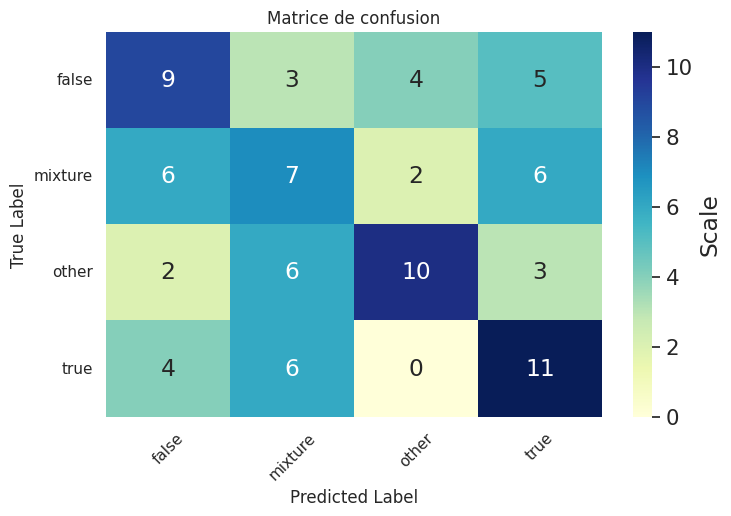

In [ ]:
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# Création d'un jeu d'apprentissage et de test
trainsize=0.9
testsize= 0.1
seed=30
train_title,test_title,train_note,test_note=train_test_split(X_train,y_train, train_size=trainsize,random_state=seed,test_size=testsize,stratify=y_train)

pipeline=Pipeline([
    ("cleaner", TextNormalizer(removedigit=True, getlemmatisation=False)),
    ("tfidf", TfidfVectorizer(lowercase=False, stop_words=None)),
    ('lr', LogisticRegression(C=100,penalty='l2', solver='liblinear'))
])
pipeline.fit(train_title,train_note)
filename='./Modele/TruevsFalsevsMixturevsOther/Lr_final_1.pkl'
print("Sauvegarde du modèle dans ", filename)
pickle.dump(pipeline, open(filename, "wb"))

print ("Chargement du modèle \n")
# le chargement se fait via la fonction load
clf_loaded = pickle.load(open(filename, 'rb'))
# affichage du modèle sauvegardé
print (clf_loaded)
# test 
y_pred = clf_loaded.predict(test_title)
# autres mesures et matrice de confusion
MyshowAllScores(test_note,y_pred)



---

Modèle MNB (MultinomialNB)



---



In [ ]:
testMNB(X_train, y_train,3,'./Data_parametrage/data_mnb_mathieu_1')

Application de gridsearch ...
pipeline : ['cleaner', 'tfidf', 'mnb']
parameters :
{'cleaner__removedigit': [True, False], 'cleaner__getlemmatisation': [True, False], 'tfidf__stop_words': ['english', None], 'tfidf__lowercase': [True, False], 'mnb__alpha': array([0.5, 0.7, 0.9, 1.1, 1.3, 1.5]), 'mnb__fit_prior': [True, False], 'mnb__force_alpha': [True, False]}
Fitting 3 folds for each of 384 candidates, totalling 1152 fits
réalisé en  279.456 s
Meilleur résultat : 0.514
Ensemble des meilleurs paramètres :
	cleaner__getlemmatisation: False
	cleaner__removedigit: True
	mnb__alpha: 0.5
	mnb__fit_prior: True
	mnb__force_alpha: True
	tfidf__lowercase: False
	tfidf__stop_words: 'english'

Les premiers résultats : 
      cleaner__getlemmatisation  cleaner__removedigit  mnb__alpha  \
194                      False                  True         0.5   
206                      False                  True         0.5   
298                      False                 False         0.5   
294       

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


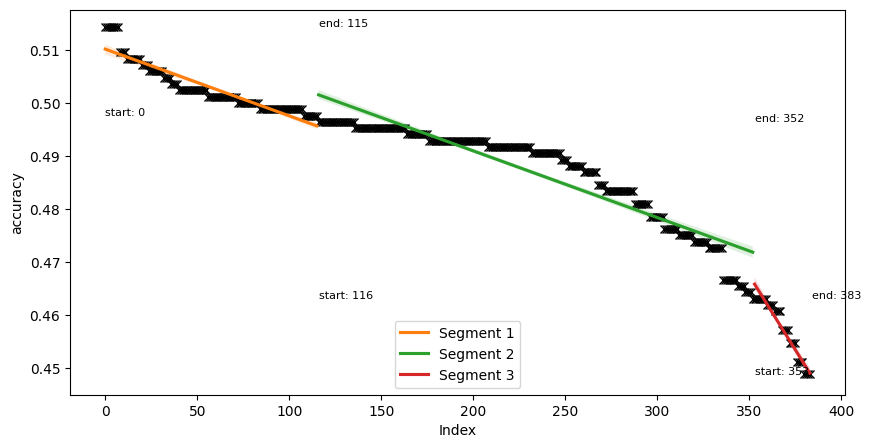

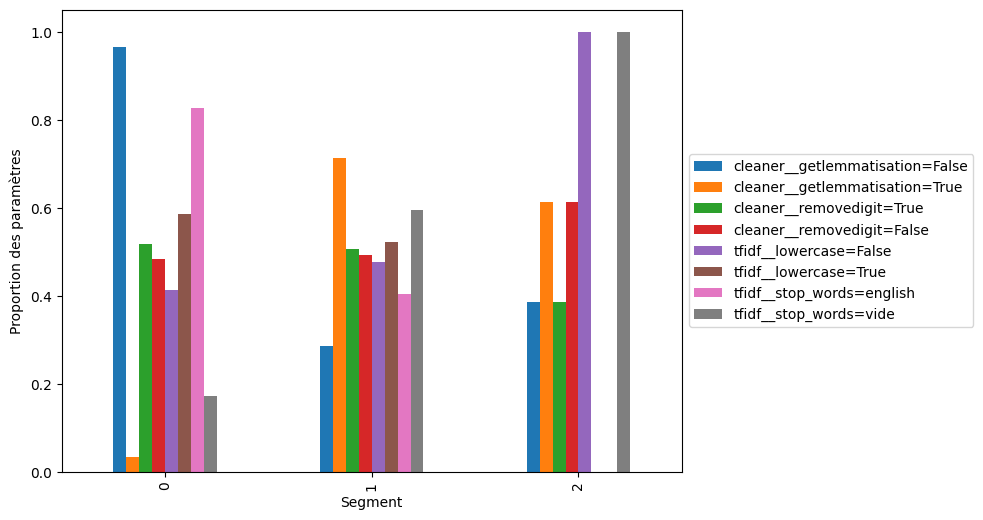

In [ ]:
from matplotlib import patches
from numpy import NaN
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
!pip install ruptures
import ruptures as rpt

# Charger les données
data = pd.read_csv('./Data_parametrage/data_mnb_mathieu_1.csv')
data.fillna('vide', inplace=True)

# Sélectionner les colonnes à analyser
y_colonne = 'accuracy'

# Choix du modèle pour trouver les points de ruptures
signal = data[y_colonne].values
model = "l2"
algo = rpt.Window(width=60, model=model, jump=1).fit(signal)
result = algo.predict(n_bkps=2)

fig, ax = plt.subplots(figsize=(10, 5))

# Choix des paramètre a garder pour l'analyse de répartition
params = ["cleaner__getlemmatisation","cleaner__removedigit",'tfidf__lowercase','tfidf__stop_words']
# params = ['mnb__force_alpha','mnb__fit_prior','mnb__alpha']


# Creation d'un dataFrame pour enregistrer les  paramètre de chaque modèle
l = []
for param in params:
  p = data[param].value_counts(normalize=True)
  for i in range(len(p)):
    x = p.index.tolist()[i]
    l.append(str(param)+"="+str(x))
mydf = pd.DataFrame(columns=l,index=[0, 1, 2])

# Ajouter tout les point qui corresponde a l'accuracy
ax.plot(data.index, data[y_colonne], 'x', color='black')

my_row=[]
for i, (start, end) in enumerate(zip([0] + result, result + [len(signal)])):
    segment = data.iloc[start:end]
    # Calcul de la proportion de chaque parametre dans chaque sous groupe
    param_props = []
    for param in params:
        param_value_counts = segment[param].value_counts(normalize=True)
        param_value_props = [f"{count*100:.2f}%" for count in param_value_counts]
        param_value_legend = " / ".join([f"{param}={param_value} ({param_value_props[j]})" for j, param_value in enumerate(param_value_counts.index)])
        param_props.append(param_value_legend)

        # Pour creer mon dataframe avec les paramètres
        for j, param_value in enumerate(param_value_counts.index):
          k=str(param)+"="+str(param_value)
          param_value_counts_df = param_value_counts.reset_index()
          param_value_counts_df = param_value_counts_df.rename(columns={param: 'Parametre', 0: 'Pourcentage'})
          mydf.loc[i][k]=param_value_counts_df.loc[j, 'Parametre']
        
    # joindre la legende
    segment_legend = " / ".join(param_props)
    
    # ajouter la droite de regression
    sns.regplot(x=segment.index, y=y_colonne, data=segment, ax=ax, color=f'C{i+1}', 
                label=f'Segment {i+1}', scatter=False)
    
    # afficher le début et la fin de chaque segment 
    if(start != len(data[y_colonne])):
        ax.text(start, segment[y_colonne].min(), f'start: {start}', fontsize=8)
        if start not in my_row: 
            my_row.append(start)
    if(end-1 != len(data[y_colonne])):
        ax.text(end, segment[y_colonne].max(), f'end: {end-1}', fontsize=8)
        if end-1 not in my_row: 
            my_row.append(end-1)
      

# Mise en page de la figure
ax.set_xlabel('Index')
ax.set_ylabel(y_colonne)
ax.legend(loc='lower center', ncol=1)
plt.show()
fig.savefig('data_svm_mathieu_1_tot.png', dpi=300, bbox_inches='tight')

# créer le graphique
fig, ax = plt.subplots(figsize=(8, 6))
mydf.plot(kind='bar', ax=ax)

# ajouter des étiquettes
ax.set_xlabel('Segment')
ax.set_ylabel('Proportion des paramètres')
legend = ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# afficher le graphique
plt.show()

On observe que le segment regroupe qui permet de supprimer les stop word ainsi qu'une majorité de getlemmatisation=False, à l'opposé le segment 1 contient que des prétraitements qui ne supprime pas les stop words et un lowercase=false.

Enregistrement du modele MNB avec les meilleurs paramètres

Sauvegarde du modèle dans  ./Modele/final/Mnb_final_1.pkl
Chargement du modèle 

Pipeline(steps=[('cleaner', TextNormalizer(removedigit=True)),
                ('tfidf',
                 TfidfVectorizer(lowercase=False, stop_words='english')),
                ('mnb', MultinomialNB(alpha=0.5, force_alpha=True))])
Accuracy : 0.476
Classification Report
              precision    recall  f1-score   support

       false    0.57143   0.57143   0.57143        21
     mixture    0.33333   0.28571   0.30769        21
       other    0.47826   0.52381   0.50000        21
        true    0.50000   0.52381   0.51163        21

    accuracy                        0.47619        84
   macro avg    0.47076   0.47619   0.47269        84
weighted avg    0.47076   0.47619   0.47269        84



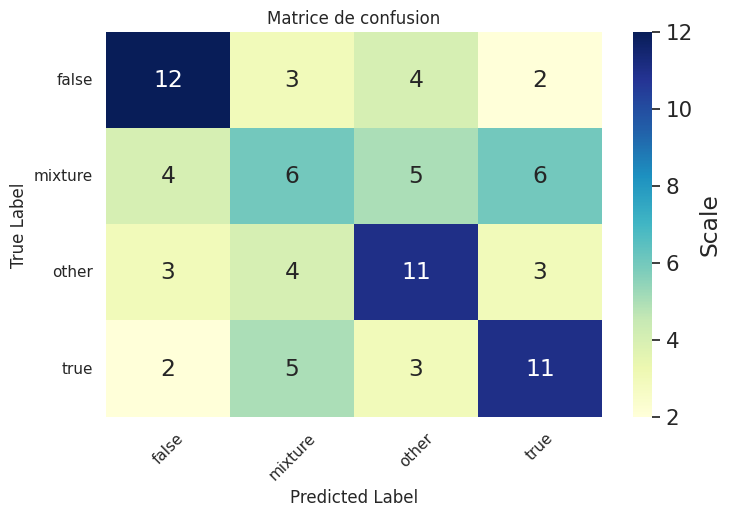

In [ ]:
import pickle
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
# Création d'un jeu d'apprentissage et de test
trainsize=0.9 
testsize= 0.1
seed=30
train_title,test_title,train_note,test_note=train_test_split(X_train,y_train, train_size=trainsize,random_state=seed,test_size=testsize,stratify=y_train)

pipeline=Pipeline([
    ("cleaner", TextNormalizer(removedigit=True, getlemmatisation=False)),
    ("tfidf", TfidfVectorizer(lowercase=False, stop_words='english')),
    ('mnb', MultinomialNB(alpha=0.5, fit_prior=True, force_alpha=True))
])
pipeline.fit(train_title,train_note)
filename='./Modele/TruevsFalsevsMixturevsOther/Mnb_final_1.pkl'
print("Sauvegarde du modèle dans ", filename)
pickle.dump(pipeline, open(filename, "wb"))
print ("Chargement du modèle \n")
# le chargement se fait via la fonction load
clf_loaded = pickle.load(open(filename, 'rb'))
# affichage du modèle sauvegardé
print (clf_loaded)
# test 
y_pred = clf_loaded.predict(test_title)
# autres mesures et matrice de confusion
MyshowAllScores(test_note,y_pred)

Récapitulatif 


1.   MNB : 0.476
2.   SVM : 0.464
3.   LR : 0.44
4.   RFC : 0.476





---



---


# **Sprint 3 : Classification avec nouvelles données basé sur les titres**


---

---





In [ ]:
mySample = pd.read_csv('./Data_equilibre/MyData_Sprint1et2.csv', sep=",")
print(mySample['our rating'].value_counts())
X_train = mySample['title']
y_train = mySample['our rating']

false      210
true       210
mixture    210
other      210
Name: our rating, dtype: int64


[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Evaluation de  MultinomialNB
MultinomialNB : 0.469 (0.042) in 0.244 s
Evaluation de  LR
LR : 0.480 (0.057) in 8.327 s
Evaluation de  KNN
KNN : 0.407 (0.048) in 0.558 s
Evaluation de  CART
CART : 0.425 (0.026) in 4.142 s
Evaluation de  RF
RF : 0.451 (0.051) in 12.061 s
Evaluation de  SVM
SVM : 0.455 (0.059) in 19.207 s

Le meilleur resultat : 
Classifier :  LR  accuracy : 0.480  (0.057)  en 8.327   s

Tous les résultats : 

Classifier :  LR  accuracy : 0.480  (0.057)  en 8.327   s
Classifier :  MultinomialNB  accuracy : 0.469  (0.042)  en 0.244   s
Classifier :  SVM  accuracy : 0.455  (0.059)  en 19.207   s
Classifier :  RF  accuracy : 0.451  (0.051)  en 12.061   s
Classifier :  CART  accuracy : 0.425  (0.026)  en 4.142   s
Classifier :  KNN  accuracy : 0.407  (0.048)  en 0.558   s


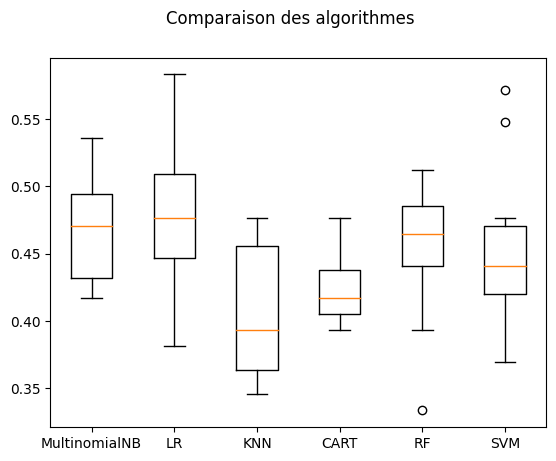

In [ ]:
testAllModel(X_train,y_train,3)

In [ ]:
testSVC(X_train, y_train,3,'./Data_parametrage/data_svm_mathieu_2')

Application de gridsearch ...
pipeline : ['cleaner', 'tfidf', 'svm']
parameters :
{'cleaner__removedigit': [True, False], 'cleaner__getlemmatisation': [True, False], 'tfidf__stop_words': ['english', None], 'tfidf__lowercase': [True, False], 'svm__C': [0.001, 0.01, 0.1, 1, 10], 'svm__gamma': [0.001, 0.01, 0.1, 1], 'svm__kernel': ['linear', 'rbf', 'poly', 'sigmoid']}
Fitting 3 folds for each of 1280 candidates, totalling 3840 fits


[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


réalisé en  72.337 s
Meilleur résultat : 0.445
Ensemble des meilleurs paramètres :
	cleaner__getlemmatisation: False
	cleaner__removedigit: False
	svm__C: 1
	svm__gamma: 0.001
	svm__kernel: 'linear'
	tfidf__lowercase: True
	tfidf__stop_words: 'english'

Les premiers résultats : 
       cleaner__getlemmatisation  cleaner__removedigit  svm__C  svm__gamma  \
1260                      False                 False    10.0       0.100   
1168                      False                 False     1.0       0.010   
1184                      False                 False     1.0       0.100   
1152                      False                 False     1.0       0.001   
1200                      False                 False     1.0       1.000   

     svm__kernel  tfidf__lowercase tfidf__stop_words  accuracy  
1260     sigmoid              True           english  0.445238  
1168      linear              True           english  0.445238  
1184      linear              True           english  0.44523

Sauvegarde du modèle dans  ./Modele/final/Svm_final_2.pkl
Chargement du modèle 

Pipeline(steps=[('cleaner', TextNormalizer()),
                ('tfidf', TfidfVectorizer(stop_words='english')),
                ('svm', SVC(C=10, gamma=0.1, kernel='sigmoid'))])
Accuracy : 0.476
Classification Report
              precision    recall  f1-score   support

       false    0.45455   0.47619   0.46512        21
     mixture    0.36000   0.42857   0.39130        21
       other    0.62500   0.47619   0.54054        21
        true    0.52381   0.52381   0.52381        21

    accuracy                        0.47619        84
   macro avg    0.49084   0.47619   0.48019        84
weighted avg    0.49084   0.47619   0.48019        84



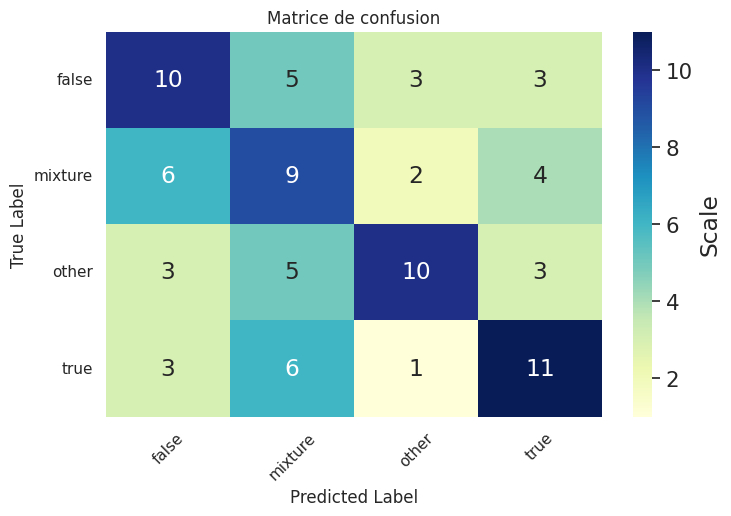

In [ ]:
from sklearn.model_selection import train_test_split
import pickle
# Création d'un jeu d'apprentissage et de test
trainsize=0.9 
testsize= 0.1
seed=30

train_title,test_title,train_note,test_note=train_test_split(X_train,y_train, train_size=trainsize,random_state=seed,test_size=testsize,stratify=y_train)

pipeline=Pipeline([
    ("cleaner", TextNormalizer(removedigit=False, getlemmatisation=False)),
    ("tfidf", TfidfVectorizer(lowercase=True, stop_words='english')),
    ('svm', SVC(C=10, gamma=0.1, kernel='sigmoid'))
])
pipeline.fit(train_title,train_note)
filename='./Modele/TruevsFalsevsMixturevsOther/Svm_final_2.pkl'
print("Sauvegarde du modèle dans ", filename)
pickle.dump(pipeline, open(filename, "wb"))


print ("Chargement du modèle \n")
# le chargement se fait via la fonction load
clf_loaded = pickle.load(open(filename, 'rb'))
# affichage du modèle sauvegardé
print (clf_loaded)


# test 
y_pred = clf_loaded.predict(test_title)
# autres mesures et matrice de confusion
MyshowAllScores(test_note,y_pred)

In [ ]:
testRFC(X_train, y_train,3,'./Data_parametrage/data_rfc_mathieu_2')

Application de gridsearch ...
pipeline : ['cleaner', 'tfidf', 'rfc']
parameters :
{'cleaner__removedigit': [True, False], 'cleaner__getlemmatisation': [True, False], 'tfidf__stop_words': ['english', None], 'tfidf__lowercase': [True, False], 'rfc__n_estimators': [500, 1200], 'rfc__max_depth': [25, 30], 'rfc__min_samples_split': [5, 10, 15], 'rfc__min_samples_leaf': [1, 2]}
Fitting 3 folds for each of 384 candidates, totalling 1152 fits
réalisé en  159.950 s
Meilleur résultat : 0.438
Ensemble des meilleurs paramètres :
	cleaner__getlemmatisation: False
	cleaner__removedigit: False
	rfc__max_depth: 30
	rfc__min_samples_leaf: 2
	rfc__min_samples_split: 15
	rfc__n_estimators: 1200
	tfidf__lowercase: True
	tfidf__stop_words: 'english'

Les premiers résultats : 
      cleaner__getlemmatisation  cleaner__removedigit  rfc__max_depth  \
380                      False                 False              30   
216                      False                  True              25   
197              

Sauvegarde du modèle dans  ./Modele/final/Rfc_final_2.pkl
Chargement du modèle 

Pipeline(steps=[('cleaner', TextNormalizer()),
                ('tfidf', TfidfVectorizer(stop_words='english')),
                ('rfc',
                 RandomForestClassifier(max_depth=30, min_samples_leaf=2,
                                        min_samples_split=5,
                                        n_estimators=1200))])
Accuracy : 0.500
Classification Report
              precision    recall  f1-score   support

       false    0.47826   0.52381   0.50000        21
     mixture    0.44000   0.52381   0.47826        21
       other    0.50000   0.47619   0.48780        21
        true    0.62500   0.47619   0.54054        21

    accuracy                        0.50000        84
   macro avg    0.51082   0.50000   0.50165        84
weighted avg    0.51082   0.50000   0.50165        84



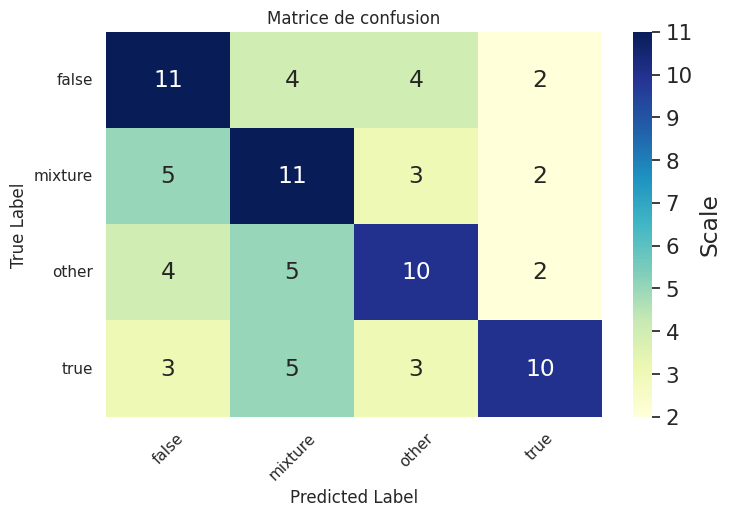

In [ ]:
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
# Création d'un jeu d'apprentissage et de test
trainsize=0.9
testsize= 0.1
seed=30
train_title,test_title,train_note,test_note=train_test_split(X_train,y_train, train_size=trainsize,random_state=seed,test_size=testsize,stratify=y_train) 

## double classification a regarder
pipeline=Pipeline([
    ("cleaner", TextNormalizer(removedigit=False, getlemmatisation=False)),
    ("tfidf", TfidfVectorizer(lowercase=True, stop_words='english')),
    ('rfc', RandomForestClassifier(max_depth=30,min_samples_leaf=2, min_samples_split=5, n_estimators=1200))
])
pipeline.fit(train_title,train_note)
filename='./Modele/TruevsFalsevsMixturevsOther/Rfc_final_2.pkl'
print("Sauvegarde du modèle dans ", filename)
pickle.dump(pipeline, open(filename, "wb"))



print ("Chargement du modèle \n")
# le chargement se fait via la fonction load
clf_loaded = pickle.load(open(filename, 'rb'))
# affichage du modèle sauvegardé
print (clf_loaded)


# test 
y_pred = clf_loaded.predict(test_title)
# autres mesures et matrice de confusion
MyshowAllScores(test_note,y_pred)

In [ ]:
testLR(X_train, y_train,3,'./Data_parametrage/data_lr_mathieu_2')

Application de gridsearch ...
pipeline : ['cleaner', 'tfidf', 'lr']
parameters :
{'cleaner__removedigit': [True, False], 'cleaner__getlemmatisation': [True, False], 'tfidf__stop_words': ['english', None], 'tfidf__lowercase': [True, False], 'lr__solver': ['newton-cg', 'lbfgs', 'liblinear'], 'lr__penalty': ['l2'], 'lr__C': [100, 10, 1.0, 0.1, 0.01]}
Fitting 3 folds for each of 240 candidates, totalling 720 fits
réalisé en  11.016 s
Meilleur résultat : 0.448
Ensemble des meilleurs paramètres :
	cleaner__getlemmatisation: False
	cleaner__removedigit: False
	lr__C: 0.1
	lr__penalty: 'l2'
	lr__solver: 'newton-cg'
	tfidf__lowercase: True
	tfidf__stop_words: 'english'

Les premiers résultats : 
      cleaner__getlemmatisation  cleaner__removedigit  lr__C lr__penalty  \
216                      False                 False    0.1          l2   
220                      False                 False    0.1          l2   
212                      False                 False    1.0          l2   
25 

Sauvegarde du modèle dans  ./Modele/final/Lr_final_2.pkl
Chargement du modèle 

Pipeline(steps=[('cleaner', TextNormalizer()),
                ('tfidf', TfidfVectorizer(stop_words='english')),
                ('lr', LogisticRegression(C=0.1, solver='newton-cg'))])
Accuracy : 0.452
Classification Report
              precision    recall  f1-score   support

       false    0.52000   0.61905   0.56522        21
     mixture    0.37500   0.42857   0.40000        21
       other    0.40909   0.42857   0.41860        21
        true    0.53846   0.33333   0.41176        21

    accuracy                        0.45238        84
   macro avg    0.46064   0.45238   0.44890        84
weighted avg    0.46064   0.45238   0.44890        84



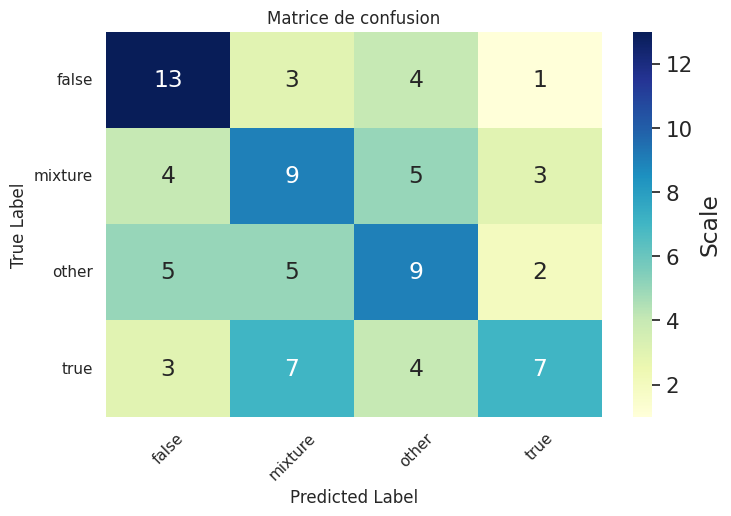

In [ ]:
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# Création d'un jeu d'apprentissage et de test
trainsize=0.9 
testsize= 0.1
seed=30
train_title,test_title,train_note,test_note=train_test_split(X_train,y_train, train_size=trainsize,random_state=seed,test_size=testsize,stratify=y_train)

pipeline=Pipeline([
    ("cleaner", TextNormalizer(removedigit=False, getlemmatisation=False)),
    ("tfidf", TfidfVectorizer(lowercase=True, stop_words='english')),
    ('lr', LogisticRegression(C=0.1,penalty='l2', solver='newton-cg'))
])
pipeline.fit(train_title,train_note)
filename='./Modele/TruevsFalsevsMixturevsOther/Lr_final_2.pkl'
print("Sauvegarde du modèle dans ", filename)
pickle.dump(pipeline, open(filename, "wb"))



print ("Chargement du modèle \n")
# le chargement se fait via la fonction load
clf_loaded = pickle.load(open(filename, 'rb'))
# affichage du modèle sauvegardé
print (clf_loaded)


# test 
y_pred = clf_loaded.predict(test_title)
# autres mesures et matrice de confusion
MyshowAllScores(test_note,y_pred)

In [ ]:
testMNB(X_train, y_train,3,'./Data_parametrage/data_mnb_mathieu_2')

Application de gridsearch ...
pipeline : ['cleaner', 'tfidf', 'mnb']
parameters :
{'cleaner__removedigit': [True, False], 'cleaner__getlemmatisation': [True, False], 'tfidf__stop_words': ['english', None], 'tfidf__lowercase': [True, False], 'mnb__alpha': array([0.5, 0.7, 0.9, 1.1, 1.3, 1.5]), 'mnb__fit_prior': [True, False], 'mnb__force_alpha': [True, False]}
Fitting 3 folds for each of 384 candidates, totalling 1152 fits
réalisé en  14.032 s
Meilleur résultat : 0.449
Ensemble des meilleurs paramètres :
	cleaner__getlemmatisation: False
	cleaner__removedigit: False
	mnb__alpha: 1.1
	mnb__fit_prior: True
	mnb__force_alpha: True
	tfidf__lowercase: True
	tfidf__stop_words: None

Les premiers résultats : 
      cleaner__getlemmatisation  cleaner__removedigit  mnb__alpha  \
345                      False                 False         1.1   
341                      False                 False         1.1   
349                      False                 False         1.1   
337             

Sauvegarde du modèle dans  ./Modele/final/Mnb_final_2.pkl
Chargement du modèle 

Pipeline(steps=[('cleaner', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('mnb',
                 MultinomialNB(alpha=1.1, fit_prior=False, force_alpha=True))])
Accuracy : 0.440
Classification Report
              precision    recall  f1-score   support

       false    0.52632   0.47619   0.50000        21
     mixture    0.25000   0.14286   0.18182        21
       other    0.48000   0.57143   0.52174        21
        true    0.42857   0.57143   0.48980        21

    accuracy                        0.44048        84
   macro avg    0.42122   0.44048   0.42334        84
weighted avg    0.42122   0.44048   0.42334        84



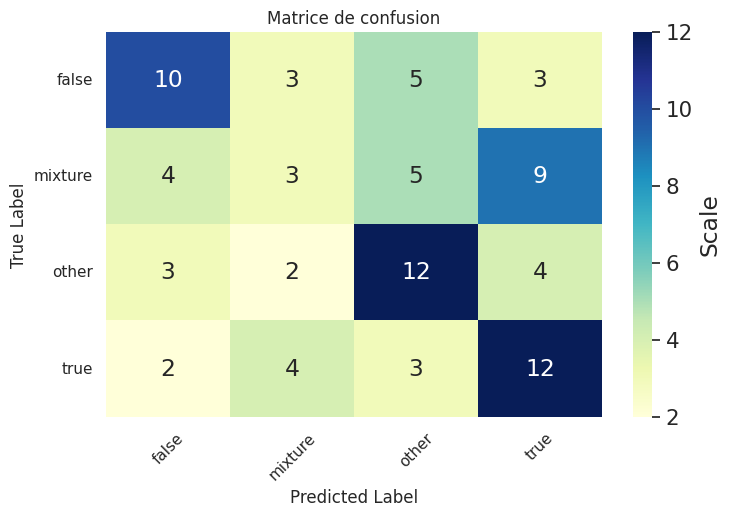

In [ ]:
import pickle
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
# Création d'un jeu d'apprentissage et de test
trainsize=0.9 
testsize= 0.1
seed=30
train_title,test_title,train_note,test_note=train_test_split(X_train,y_train, train_size=trainsize,random_state=seed,test_size=testsize,stratify=y_train)

pipeline=Pipeline([
    ("cleaner", TextNormalizer(removedigit=False, getlemmatisation=False)),
    ("tfidf", TfidfVectorizer(lowercase=True, stop_words=None)),
    ('mnb', MultinomialNB(alpha=1.1, fit_prior=False, force_alpha=True))
])
pipeline.fit(train_title,train_note)
filename='./Modele/TruevsFalsevsMixturevsOther/Mnb_final_2.pkl'
print("Sauvegarde du modèle dans ", filename)
pickle.dump(pipeline, open(filename, "wb"))



print ("Chargement du modèle \n")
# le chargement se fait via la fonction load
clf_loaded = pickle.load(open(filename, 'rb'))
# affichage du modèle sauvegardé
print (clf_loaded)


# test  
y_pred = clf_loaded.predict(test_title)
# autres mesures et matrice de confusion
MyshowAllScores(test_note,y_pred)



---



---



# **Sprint 4 : Double classification avec nouvelles données**


---




---



- Etape 1 : Premiere classification sur True/False vs Other/mixture
- Etape 2 : Seconde classification sur Other vs mixture avec les données venant de Other/mixture 
- Etape 3 : Seconde classification sur True vs FAlse avec les données venant de True/False
- Etape 4 : Mise en forme de la fonction 

*Etape 1 : Premiere classification sur True vs False vs Other/mixture*

In [ ]:
mySample = pd.read_csv('./Data_equilibre/MyData_Sprint1et2.csv', sep=",")

mySample['notation'] = mySample['our rating']

for i in range(0,len(mySample['notation'])):
     if mySample['notation'][i] == 'false' or mySample['notation'][i] == 'true':
         mySample['notation'][i] = 'false/true'
     if mySample['notation'][i] == 'other' or mySample['notation'][i] == 'mixture':
         mySample['notation'][i] = 'other/mixture'



print(mySample['notation'].value_counts())

X_train = mySample['text']
y_train = mySample['notation']
z_train = mySample['our rating']

false/true       420
other/mixture    420
Name: notation, dtype: int64


<ipython-input-13-edb7777ad9d1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mySample['notation'][i] = 'false/true'
<ipython-input-13-edb7777ad9d1>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mySample['notation'][i] = 'other/mixture'


[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Evaluation de  MultinomialNB
MultinomialNB : 0.648 (0.044) in 1.360 s
Evaluation de  LR
LR : 0.651 (0.049) in 9.330 s
Evaluation de  KNN
KNN : 0.586 (0.057) in 2.710 s
Evaluation de  CART
CART : 0.560 (0.062) in 27.253 s
Evaluation de  RF
RF : 0.637 (0.043) in 24.054 s
Evaluation de  SVM
SVM : 0.658 (0.051) in 181.455 s

Le meilleur resultat : 
Classifier :  SVM  accuracy : 0.658  (0.051)  en 181.455   s

Tous les résultats : 

Classifier :  SVM  accuracy : 0.658  (0.051)  en 181.455   s
Classifier :  LR  accuracy : 0.651  (0.049)  en 9.330   s
Classifier :  MultinomialNB  accuracy : 0.648  (0.044)  en 1.360   s
Classifier :  RF  accuracy : 0.637  (0.043)  en 24.054   s
Classifier :  KNN  accuracy : 0.586  (0.057)  en 2.710   s
Classifier :  CART  accuracy : 0.560  (0.062)  en 27.253   s


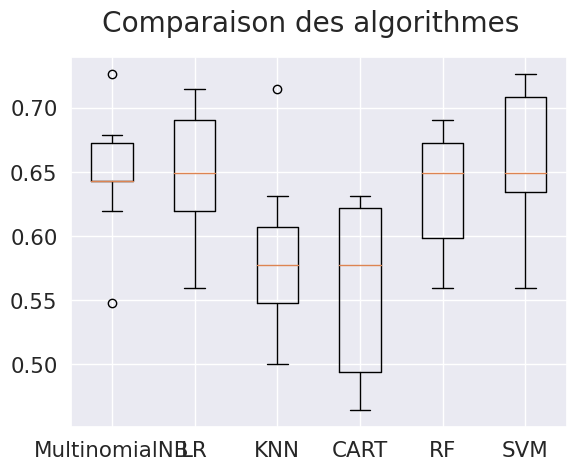

In [ ]:
testAllModel(X_train,y_train,3)

In [ ]:
testSVC(X_train, y_train,3,"./Data_parametrage/data_svm_mat_4_1")

Application de gridsearch ...
pipeline : ['cleaner', 'tfidf', 'svm']
parameters :
{'cleaner__removedigit': [True, False], 'cleaner__getlemmatisation': [True, False], 'tfidf__stop_words': ['english', None], 'tfidf__lowercase': [True, False], 'svm__C': [0.001, 0.01, 0.1, 1, 10], 'svm__gamma': [0.001, 0.01, 0.1, 1], 'svm__kernel': ['linear', 'rbf', 'poly', 'sigmoid']}
Fitting 3 folds for each of 1280 candidates, totalling 3840 fits


[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


réalisé en  984.092 s
Meilleur résultat : 0.569
Ensemble des meilleurs paramètres :
	cleaner__getlemmatisation: False
	cleaner__removedigit: True
	svm__C: 10
	svm__gamma: 1
	svm__kernel: 'sigmoid'
	tfidf__lowercase: True
	tfidf__stop_words: 'english'

Les premiers résultats : 
       cleaner__getlemmatisation  cleaner__removedigit  svm__C  svm__gamma  \
956                       False                  True    10.0        1.00   
1276                      False                 False    10.0        1.00   
1248                      False                 False    10.0        0.10   
1264                      False                 False    10.0        1.00   
1232                      False                 False    10.0        0.01   

     svm__kernel  tfidf__lowercase tfidf__stop_words  accuracy  
956      sigmoid              True           english  0.569048  
1276     sigmoid              True           english  0.565476  
1248      linear              True           english  0.564286 

Sauvegarde du modèle dans  ./Modele/final/Svm_final_4.pkl
Chargement du modèle 

Pipeline(steps=[('cleaner', TextNormalizer(removedigit=True)),
                ('tfidf', TfidfVectorizer(stop_words='english')),
                ('svm', SVC(C=10, gamma=1, kernel='sigmoid'))])
Accuracy : 0.619
Classification Report
               precision    recall  f1-score   support

   false/true    0.61364   0.64286   0.62791        42
other/mixture    0.62500   0.59524   0.60976        42

     accuracy                        0.61905        84
    macro avg    0.61932   0.61905   0.61883        84
 weighted avg    0.61932   0.61905   0.61883        84



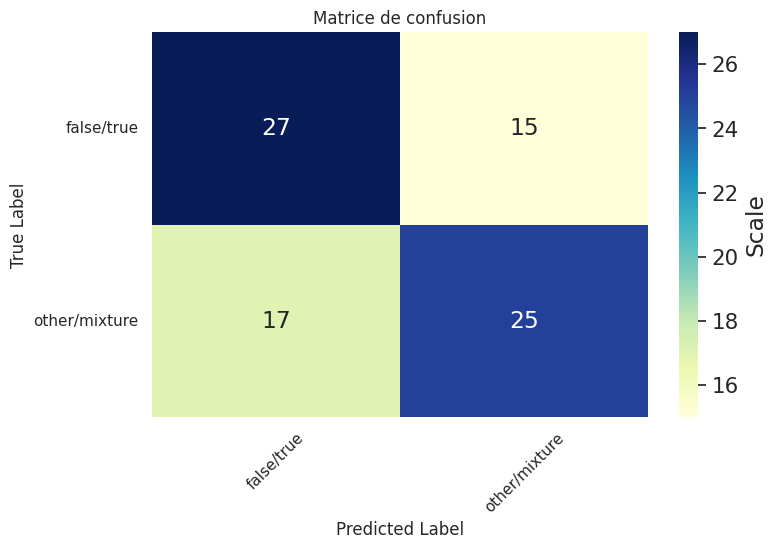

In [ ]:
from sklearn.model_selection import train_test_split
import pickle
# Création d'un jeu d'apprentissage et de test
trainsize=0.9 # 70% pour le jeu d'apprentissage, il reste 30% du jeu de données pour
testsize= 0.1
seed=30

train_title,test_title,train_note,test_note,train_rating,test_rating=train_test_split(X_train,y_train,z_train, train_size=trainsize,random_state=seed,test_size=testsize,stratify=z_train)

pipeline=Pipeline([
    ("cleaner", TextNormalizer(removedigit=True, getlemmatisation=False)),
    ("tfidf", TfidfVectorizer(lowercase=True, stop_words='english')),
    ('svm', SVC(C=10, gamma=1, kernel='sigmoid'))
])
pipeline.fit(train_title,train_note)
filename='./Modele/TruevsFalsevsMixturevsOther/Svm_final_4.pkl'
print("Sauvegarde du modèle dans ", filename)
pickle.dump(pipeline, open(filename, "wb"))


print ("Chargement du modèle \n")
# le chargement se fait via la fonction load
clf_loaded = pickle.load(open(filename, 'rb'))
# affichage du modèle sauvegardé
print (clf_loaded)


# test  avec les données qu'il a apprise c'est parfait woahhha c'est beau
y_pred = clf_loaded.predict(test_title)
# autres mesures et matrice de confusion
MyshowAllScores(test_note,y_pred)

In [ ]:
testRFC(X_train, y_train,3,"./Data_parametrage/data_rfc_mat_4_1")

Application de gridsearch ...
pipeline : ['cleaner', 'tfidf', 'rfc']
parameters :
{'cleaner__removedigit': [True, False], 'cleaner__getlemmatisation': [True, False], 'tfidf__stop_words': ['english', None], 'tfidf__lowercase': [True, False], 'rfc__n_estimators': [500, 1200], 'rfc__max_depth': [25, 30], 'rfc__min_samples_split': [5, 10, 15], 'rfc__min_samples_leaf': [1, 2]}
Fitting 3 folds for each of 384 candidates, totalling 1152 fits
réalisé en  466.706 s
Meilleur résultat : 0.551
Ensemble des meilleurs paramètres :
	cleaner__getlemmatisation: False
	cleaner__removedigit: False
	rfc__max_depth: 30
	rfc__min_samples_leaf: 2
	rfc__min_samples_split: 10
	rfc__n_estimators: 500
	tfidf__lowercase: True
	tfidf__stop_words: 'english'

Les premiers résultats : 
      cleaner__getlemmatisation  cleaner__removedigit  rfc__max_depth  \
368                      False                 False              30   
280                      False                  True              30   
80                

Sauvegarde du modèle dans  ./Modele/final/Rfc_final_4.pkl
Chargement du modèle 

Pipeline(steps=[('cleaner', TextNormalizer()),
                ('tfidf', TfidfVectorizer(stop_words='english')),
                ('rfc',
                 RandomForestClassifier(max_depth=30, min_samples_leaf=2,
                                        min_samples_split=10,
                                        n_estimators=500))])
Accuracy : 0.631
Classification Report
               precision    recall  f1-score   support

   false/true    0.63415   0.61905   0.62651        42
other/mixture    0.62791   0.64286   0.63529        42

     accuracy                        0.63095        84
    macro avg    0.63103   0.63095   0.63090        84
 weighted avg    0.63103   0.63095   0.63090        84



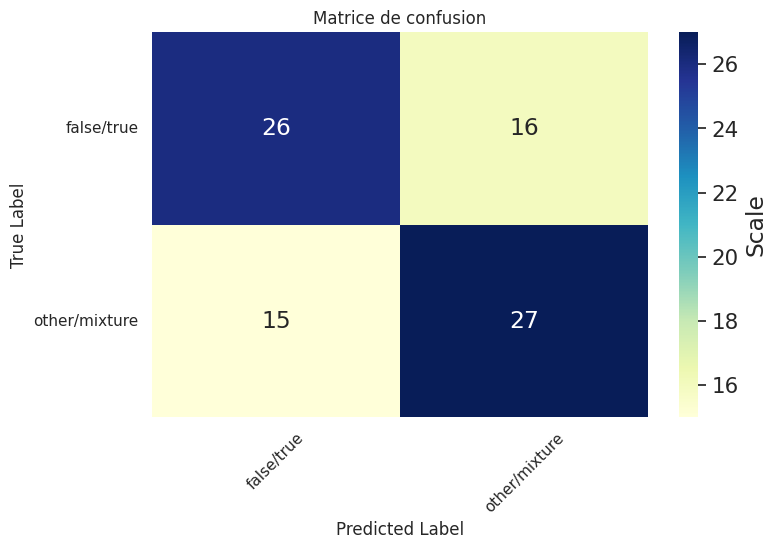

In [ ]:
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
# Création d'un jeu d'apprentissage et de test
trainsize=0.9 # 70% pour le jeu d'apprentissage, il reste 30% du jeu de données pour
testsize= 0.1
seed=30
train_title,test_title,train_note,test_note,train_rating,test_rating=train_test_split(X_train,y_train,z_train, train_size=trainsize,random_state=seed,test_size=testsize,stratify=z_train)

## double classification a regarder
pipeline=Pipeline([
    ("cleaner", TextNormalizer(removedigit=False, getlemmatisation=False)),
    ("tfidf", TfidfVectorizer(lowercase=True, stop_words='english')),
    ('rfc', RandomForestClassifier(max_depth=30,min_samples_leaf=2, min_samples_split=10, n_estimators=500))
])
pipeline.fit(train_title,train_note)
filename='./Modele/TruevsFalsevsMixturevsOther/Rfc_final_4.pkl'
print("Sauvegarde du modèle dans ", filename)
pickle.dump(pipeline, open(filename, "wb"))



print ("Chargement du modèle \n")
# le chargement se fait via la fonction load
clf_loaded = pickle.load(open(filename, 'rb'))
# affichage du modèle sauvegardé
print (clf_loaded)


# test  avec les données qu'il a apprise c'est parfait woahhha c'est beau
y_pred = clf_loaded.predict(test_title)
# autres mesures et matrice de confusion
MyshowAllScores(test_note,y_pred)

In [ ]:
testLR(X_train, y_train,3,'./Data_parametrage/data_lr_mat_4')

Application de gridsearch ...
pipeline : ['cleaner', 'tfidf', 'lr']
parameters :
{'cleaner__removedigit': [True, False], 'cleaner__getlemmatisation': [True, False], 'tfidf__stop_words': ['english', None], 'tfidf__lowercase': [True, False], 'lr__solver': ['newton-cg', 'lbfgs', 'liblinear'], 'lr__penalty': ['l2'], 'lr__C': [100, 10, 1.0, 0.1, 0.01]}
Fitting 3 folds for each of 240 candidates, totalling 720 fits


/usr/local/lib/python3.9/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



réalisé en  181.829 s
Meilleur résultat : 0.560
Ensemble des meilleurs paramètres :
	cleaner__getlemmatisation: False
	cleaner__removedigit: True
	lr__C: 100
	lr__penalty: 'l2'
	lr__solver: 'newton-cg'
	tfidf__lowercase: True
	tfidf__stop_words: None

Les premiers résultats : 
      cleaner__getlemmatisation  cleaner__removedigit  lr__C lr__penalty  \
121                      False                  True  100.0          l2   
125                      False                  True  100.0          l2   
129                      False                  True  100.0          l2   
120                      False                  True  100.0          l2   
128                      False                  True  100.0          l2   

    lr__solver  tfidf__lowercase tfidf__stop_words  accuracy  
121  newton-cg              True              None  0.559524  
125      lbfgs              True              None  0.559524  
129  liblinear              True              None  0.558333  
120  newton-cg    

Sauvegarde du modèle dans  ./Modele/final/Lr_final_4.pkl
Chargement du modèle 

Pipeline(steps=[('cleaner', TextNormalizer(removedigit=True)),
                ('tfidf', TfidfVectorizer()),
                ('lr', LogisticRegression(C=100, solver='newton-cg'))])
Accuracy : 0.667
Classification Report
               precision    recall  f1-score   support

   false/true    0.64000   0.76190   0.69565        42
other/mixture    0.70588   0.57143   0.63158        42

     accuracy                        0.66667        84
    macro avg    0.67294   0.66667   0.66362        84
 weighted avg    0.67294   0.66667   0.66362        84



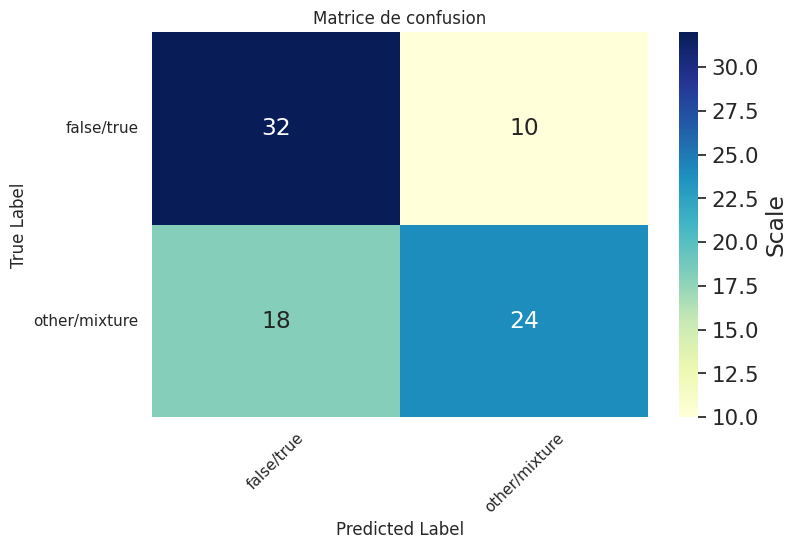

In [ ]:
from os import truncate
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# Création d'un jeu d'apprentissage et de test
trainsize=0.9 # 70% pour le jeu d'apprentissage, il reste 30% du jeu de données pour
testsize= 0.1
seed=30
train_title,test_title,train_note,test_note,train_rating,test_rating=train_test_split(X_train,y_train,z_train, train_size=trainsize,random_state=seed,test_size=testsize,stratify=z_train)

pipeline=Pipeline([
    ("cleaner", TextNormalizer(removedigit=True, getlemmatisation=False)),
    ("tfidf", TfidfVectorizer(lowercase=True, stop_words=None)),
    ('lr', LogisticRegression(C=100,penalty='l2', solver='newton-cg'))
])
pipeline.fit(train_title,train_note)
filename='./Modele/TruevsFalsevsMixturevsOther/Lr_final_4.pkl'
print("Sauvegarde du modèle dans ", filename)
pickle.dump(pipeline, open(filename, "wb"))



print ("Chargement du modèle \n")
# le chargement se fait via la fonction load
clf_loaded = pickle.load(open(filename, 'rb'))
# affichage du modèle sauvegardé
print (clf_loaded)


# test  avec les données qu'il a apprise c'est parfait woahhha c'est beau
y_pred = clf_loaded.predict(test_title)
# autres mesures et matrice de confusion
MyshowAllScores(test_note,y_pred)

In [ ]:
testMNB(X_train, y_train,3,"./Data_parametrage/data_mnb_mat_4_1")

Application de gridsearch ...
pipeline : ['cleaner', 'tfidf', 'mnb']
parameters :
{'cleaner__removedigit': [True, False], 'cleaner__getlemmatisation': [True, False], 'tfidf__stop_words': ['english', None], 'tfidf__lowercase': [True, False], 'mnb__alpha': array([0.5, 0.7, 0.9, 1.1, 1.3, 1.5]), 'mnb__fit_prior': [True, False], 'mnb__force_alpha': [True, False]}
Fitting 3 folds for each of 384 candidates, totalling 1152 fits
réalisé en  250.272 s
Meilleur résultat : 0.529
Ensemble des meilleurs paramètres :
	cleaner__getlemmatisation: False
	cleaner__removedigit: True
	mnb__alpha: 0.5
	mnb__fit_prior: True
	mnb__force_alpha: True
	tfidf__lowercase: True
	tfidf__stop_words: None

Les premiers résultats : 
      cleaner__getlemmatisation  cleaner__removedigit  mnb__alpha  \
197                      False                  True         0.5   
193                      False                  True         0.5   
205                      False                  True         0.5   
201             

Sauvegarde du modèle dans  ./Modele/final/Mnb_final_4.pkl
Chargement du modèle 

Pipeline(steps=[('cleaner', TextNormalizer(removedigit=True)),
                ('tfidf', TfidfVectorizer()),
                ('mnb', MultinomialNB(alpha=0.5, force_alpha=False))])
Accuracy : 0.607
Classification Report
               precision    recall  f1-score   support

   false/true    0.60000   0.64286   0.62069        42
other/mixture    0.61538   0.57143   0.59259        42

     accuracy                        0.60714        84
    macro avg    0.60769   0.60714   0.60664        84
 weighted avg    0.60769   0.60714   0.60664        84



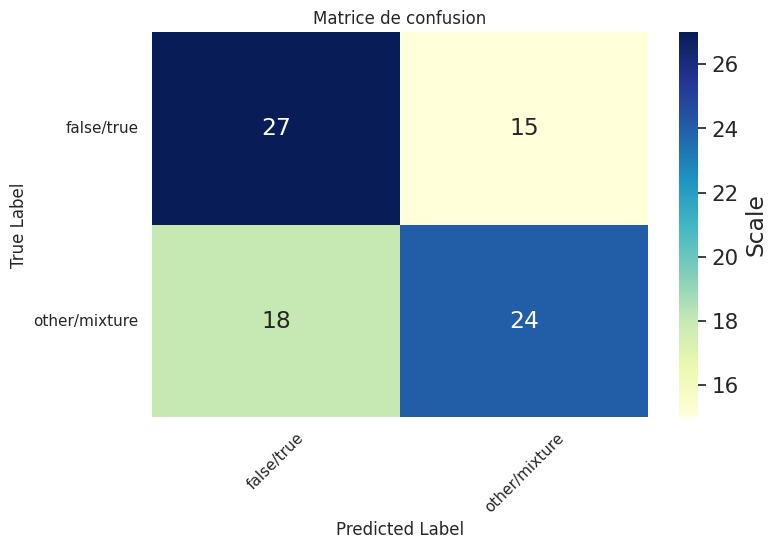

In [ ]:
import pickle
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
# Création d'un jeu d'apprentissage et de test
trainsize=0.9 # 70% pour le jeu d'apprentissage, il reste 30% du jeu de données pour
testsize= 0.1
seed=30
train_title,test_title,train_note,test_note,train_rating,test_rating=train_test_split(X_train,y_train,z_train, train_size=trainsize,random_state=seed,test_size=testsize,stratify=z_train)

pipeline=Pipeline([
    ("cleaner", TextNormalizer(removedigit=True, getlemmatisation=False)),
    ("tfidf", TfidfVectorizer(lowercase=True, stop_words=None)),
    ('mnb', MultinomialNB(alpha=0.5, fit_prior=True, force_alpha=False))
])
pipeline.fit(train_title,train_note)
filename='./Modele/TruevsFalsevsMixturevsOther/Mnb_final_4.pkl'
print("Sauvegarde du modèle dans ", filename)
pickle.dump(pipeline, open(filename, "wb"))



print ("Chargement du modèle \n")
# le chargement se fait via la fonction load
clf_loaded = pickle.load(open(filename, 'rb'))
# affichage du modèle sauvegardé
print (clf_loaded)


# test  avec les données qu'il a apprise c'est parfait woahhha c'est beau
y_pred = clf_loaded.predict(test_title)
# autres mesures et matrice de confusion
MyshowAllScores(test_note,y_pred)



---


Etape 2 : Recherche du meilleure modèle pour la seconde classification sur Other vs mixture avec les données  classé pour Other/mixture





---



In [ ]:
mySample2 = mySample.loc[~mySample['our rating'].isin(["false","true"])]
print(mySample2['our rating'].value_counts())
X_train = mySample2['text']
y_train = mySample2['our rating']

mixture    210
other      210
Name: our rating, dtype: int64


[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Evaluation de  MultinomialNB
MultinomialNB : 0.710 (0.064) in 0.609 s
Evaluation de  LR
LR : 0.740 (0.062) in 4.222 s
Evaluation de  KNN
KNN : 0.676 (0.068) in 1.629 s
Evaluation de  CART
CART : 0.640 (0.076) in 5.260 s
Evaluation de  RF
RF : 0.731 (0.059) in 7.568 s
Evaluation de  SVM
SVM : 0.752 (0.065) in 19.815 s

Le meilleur resultat : 
Classifier :  SVM  accuracy : 0.752  (0.065)  en 19.815   s

Tous les résultats : 

Classifier :  SVM  accuracy : 0.752  (0.065)  en 19.815   s
Classifier :  LR  accuracy : 0.740  (0.062)  en 4.222   s
Classifier :  RF  accuracy : 0.731  (0.059)  en 7.568   s
Classifier :  MultinomialNB  accuracy : 0.710  (0.064)  en 0.609   s
Classifier :  KNN  accuracy : 0.676  (0.068)  en 1.629   s
Classifier :  CART  accuracy : 0.640  (0.076)  en 5.260   s


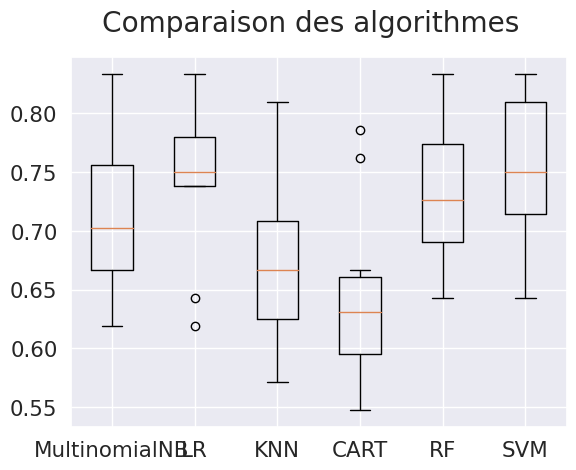

In [ ]:
testAllModel(X_train,y_train,3)

In [ ]:
testSVC(X_train, y_train,3,"./Data_parametrage/data_svm_mat_4_2")

Application de gridsearch ...
pipeline : ['cleaner', 'tfidf', 'svm']
parameters :
{'cleaner__removedigit': [True, False], 'cleaner__getlemmatisation': [True, False], 'tfidf__stop_words': ['english', None], 'tfidf__lowercase': [True, False], 'svm__C': [0.001, 0.01, 0.1, 1, 10], 'svm__gamma': [0.001, 0.01, 0.1, 1], 'svm__kernel': ['linear', 'rbf', 'poly', 'sigmoid']}
Fitting 3 folds for each of 1280 candidates, totalling 3840 fits


[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
/usr/local/lib/python3.9/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


réalisé en  426.727 s
Meilleur résultat : 0.717
Ensemble des meilleurs paramètres :
	cleaner__getlemmatisation: True
	cleaner__removedigit: True
	svm__C: 1
	svm__gamma: 0.001
	svm__kernel: 'linear'
	tfidf__lowercase: False
	tfidf__stop_words: 'english'

Les premiers résultats : 
      cleaner__getlemmatisation  cleaner__removedigit  svm__C  svm__gamma  \
210                       True                  True     1.0       0.010   
194                       True                  True     1.0       0.001   
226                       True                  True     1.0       0.100   
302                       True                  True    10.0       0.100   
242                       True                  True     1.0       1.000   

    svm__kernel  tfidf__lowercase tfidf__stop_words  accuracy  
210      linear             False           english  0.716667  
194      linear             False           english  0.716667  
226      linear             False           english  0.716667  
302   

Sauvegarde du modèle dans  ./Modele/final/Svm_final_4_step2.pkl
Chargement du modèle 

Pipeline(steps=[('cleaner',
                 TextNormalizer(getlemmatisation=True, removedigit=True)),
                ('tfidf',
                 TfidfVectorizer(lowercase=False, stop_words='english')),
                ('svm', SVC(C=1, gamma=0.01, kernel='linear'))])
Accuracy : 0.643
Classification Report
              precision    recall  f1-score   support

     mixture    0.65000   0.61905   0.63415        21
       other    0.63636   0.66667   0.65116        21

    accuracy                        0.64286        42
   macro avg    0.64318   0.64286   0.64265        42
weighted avg    0.64318   0.64286   0.64265        42



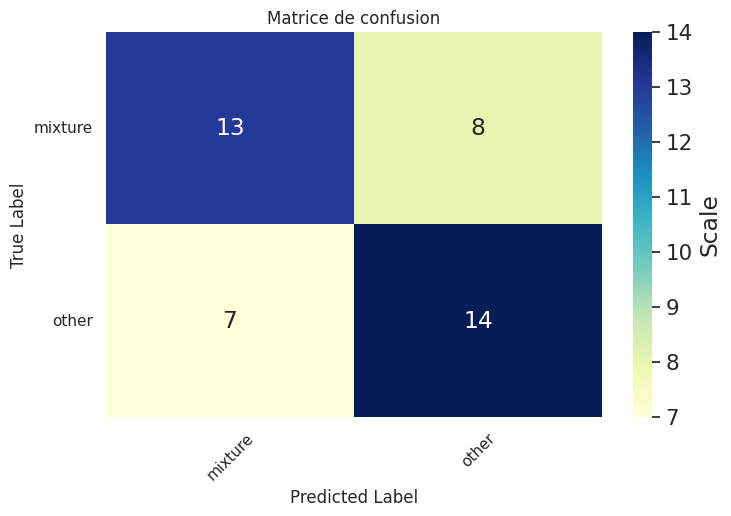

In [ ]:
from sklearn.model_selection import train_test_split
import pickle
# Création d'un jeu d'apprentissage et de test
trainsize=0.9 # 70% pour le jeu d'apprentissage, il reste 30% du jeu de données pour
testsize= 0.1
seed=30

train_title,test_title,train_note,test_note=train_test_split(X_train,y_train, train_size=trainsize,random_state=seed,test_size=testsize,stratify=y_train)

pipeline=Pipeline([
    ("cleaner", TextNormalizer(removedigit=True, getlemmatisation=True)),
    ("tfidf", TfidfVectorizer(lowercase=False, stop_words='english')),
    ('svm', SVC(C=1, gamma=0.01, kernel='linear'))
])
pipeline.fit(train_title,train_note)
filename='./Modele/TruevsFalsevsMixturevsOther/Svm_final_4_step2.pkl'
print("Sauvegarde du modèle dans ", filename)
pickle.dump(pipeline, open(filename, "wb"))


print ("Chargement du modèle \n")
# le chargement se fait via la fonction load
clf_loaded = pickle.load(open(filename, 'rb'))
# affichage du modèle sauvegardé
print (clf_loaded)


# test  avec les données qu'il a apprise c'est parfait woahhha c'est beau
y_pred = clf_loaded.predict(test_title)
# autres mesures et matrice de confusion
MyshowAllScores(test_note,y_pred)

In [ ]:
testRFC(X_train, y_train,3,"./Data_parametrage/data_rfc_mat_4_2")

Application de gridsearch ...
pipeline : ['cleaner', 'tfidf', 'rfc']
parameters :
{'cleaner__removedigit': [True, False], 'cleaner__getlemmatisation': [True, False], 'tfidf__stop_words': ['english', None], 'tfidf__lowercase': [True, False], 'rfc__n_estimators': [500, 1200], 'rfc__max_depth': [25, 30], 'rfc__min_samples_split': [5, 10, 15], 'rfc__min_samples_leaf': [1, 2]}
Fitting 3 folds for each of 384 candidates, totalling 1152 fits
réalisé en  251.984 s
Meilleur résultat : 0.719
Ensemble des meilleurs paramètres :
	cleaner__getlemmatisation: True
	cleaner__removedigit: False
	rfc__max_depth: 25
	rfc__min_samples_leaf: 2
	rfc__min_samples_split: 15
	rfc__n_estimators: 500
	tfidf__lowercase: True
	tfidf__stop_words: None

Les premiers résultats : 
      cleaner__getlemmatisation  cleaner__removedigit  rfc__max_depth  \
137                       True                 False              25   
349                      False                 False              30   
5                       

Sauvegarde du modèle dans  ./Modele/final/Rfc_final_4_step2.pkl
Chargement du modèle 

Pipeline(steps=[('cleaner', TextNormalizer(getlemmatisation=True)),
                ('tfidf', TfidfVectorizer()),
                ('rfc',
                 RandomForestClassifier(max_depth=25, min_samples_leaf=2,
                                        min_samples_split=15,
                                        n_estimators=500))])
Accuracy : 0.762
Classification Report
              precision    recall  f1-score   support

     mixture    0.76190   0.76190   0.76190        21
       other    0.76190   0.76190   0.76190        21

    accuracy                        0.76190        42
   macro avg    0.76190   0.76190   0.76190        42
weighted avg    0.76190   0.76190   0.76190        42



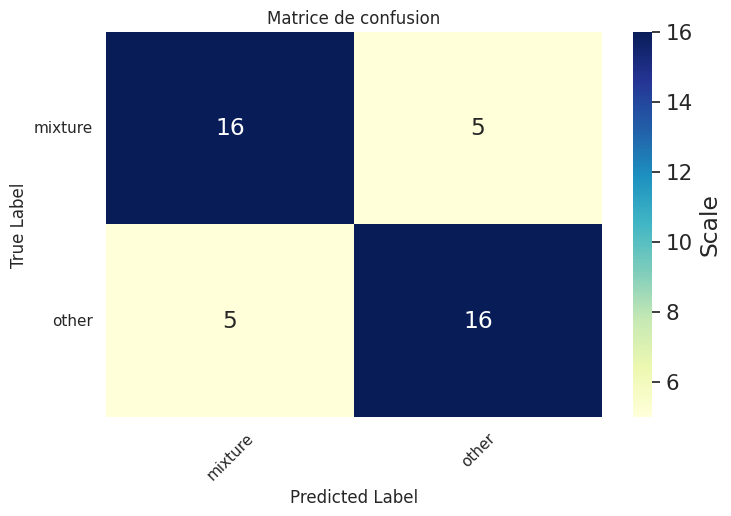

In [ ]:
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
# Création d'un jeu d'apprentissage et de test
trainsize=0.9 # 70% pour le jeu d'apprentissage, il reste 30% du jeu de données pour
testsize= 0.1
seed=30
train_title,test_title,train_note,test_note=train_test_split(X_train,y_train, train_size=trainsize,random_state=seed,test_size=testsize,stratify=y_train)  # stratified = yes

## double classification a regarder
pipeline=Pipeline([
    ("cleaner", TextNormalizer(removedigit=False, getlemmatisation=True)),
    ("tfidf", TfidfVectorizer(lowercase=True, stop_words=None)),
    ('rfc', RandomForestClassifier(max_depth=25,min_samples_leaf=2, min_samples_split=15, n_estimators=500))
])
pipeline.fit(train_title,train_note)
filename='./Modele/TruevsFalsevsMixturevsOther/Rfc_final_4_step2.pkl'
print("Sauvegarde du modèle dans ", filename)
pickle.dump(pipeline, open(filename, "wb"))



print ("Chargement du modèle \n")
# le chargement se fait via la fonction load
clf_loaded = pickle.load(open(filename, 'rb'))
# affichage du modèle sauvegardé
print (clf_loaded)


# test  avec les données qu'il a apprise c'est parfait woahhha c'est beau
y_pred = clf_loaded.predict(test_title)
# autres mesures et matrice de confusion
MyshowAllScores(test_note,y_pred)

In [ ]:
testLR(X_train, y_train,3,"./Data_parametrage/data_lr_mat_4_2")

Application de gridsearch ...
pipeline : ['cleaner', 'tfidf', 'lr']
parameters :
{'cleaner__removedigit': [True, False], 'cleaner__getlemmatisation': [True, False], 'tfidf__stop_words': ['english', None], 'tfidf__lowercase': [True, False], 'lr__solver': ['newton-cg', 'lbfgs', 'liblinear'], 'lr__penalty': ['l2'], 'lr__C': [100, 10, 1.0, 0.1, 0.01]}
Fitting 3 folds for each of 240 candidates, totalling 720 fits
réalisé en  71.005 s
Meilleur résultat : 0.721
Ensemble des meilleurs paramètres :
	cleaner__getlemmatisation: False
	cleaner__removedigit: True
	lr__C: 10
	lr__penalty: 'l2'
	lr__solver: 'newton-cg'
	tfidf__lowercase: False
	tfidf__stop_words: 'english'

Les premiers résultats : 
      cleaner__getlemmatisation  cleaner__removedigit  lr__C lr__penalty  \
134                      False                  True   10.0          l2   
138                      False                  True   10.0          l2   
142                      False                  True   10.0          l2   
12  

Sauvegarde du modèle dans  ./Modele/final/Lr_final_4_step2.pkl
Chargement du modèle 

Pipeline(steps=[('cleaner', TextNormalizer(removedigit=True)),
                ('tfidf',
                 TfidfVectorizer(lowercase=False, stop_words='english')),
                ('lr', LogisticRegression(C=10, solver='newton-cg'))])
Accuracy : 0.690
Classification Report
              precision    recall  f1-score   support

     mixture    0.70000   0.66667   0.68293        21
       other    0.68182   0.71429   0.69767        21

    accuracy                        0.69048        42
   macro avg    0.69091   0.69048   0.69030        42
weighted avg    0.69091   0.69048   0.69030        42



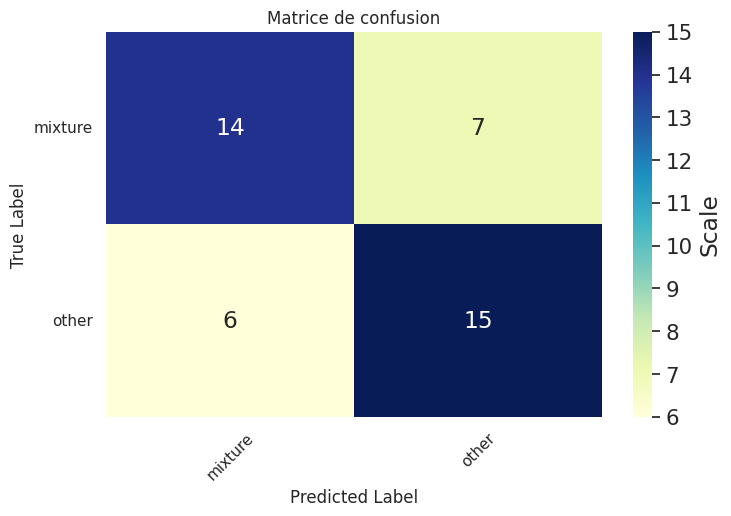

In [ ]:
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# Création d'un jeu d'apprentissage et de test
trainsize=0.9 # 70% pour le jeu d'apprentissage, il reste 30% du jeu de données pour
testsize= 0.1
seed=30
train_title,test_title,train_note,test_note=train_test_split(X_train,y_train, train_size=trainsize,random_state=seed,test_size=testsize,stratify=y_train)

pipeline=Pipeline([
    ("cleaner", TextNormalizer(removedigit=True, getlemmatisation=False)),
    ("tfidf", TfidfVectorizer(lowercase=False, stop_words='english')),
    ('lr', LogisticRegression(C=10,penalty='l2', solver='newton-cg'))
])
pipeline.fit(train_title,train_note)
filename='./Modele/TruevsFalsevsMixturevsOther/Lr_final_4_step2.pkl'
print("Sauvegarde du modèle dans ", filename)
pickle.dump(pipeline, open(filename, "wb"))



print ("Chargement du modèle \n")
# le chargement se fait via la fonction load
clf_loaded = pickle.load(open(filename, 'rb'))
# affichage du modèle sauvegardé
print (clf_loaded)


# test  avec les données qu'il a apprise c'est parfait woahhha c'est beau
y_pred = clf_loaded.predict(test_title)
# autres mesures et matrice de confusion
MyshowAllScores(test_note,y_pred)

In [ ]:
testMNB(X_train, y_train,3,"./Data_parametrage/data_mnb_mat_4_2")

Application de gridsearch ...
pipeline : ['cleaner', 'tfidf', 'mnb']
parameters :
{'cleaner__removedigit': [True, False], 'cleaner__getlemmatisation': [True, False], 'tfidf__stop_words': ['english', None], 'tfidf__lowercase': [True, False], 'mnb__alpha': array([0.5, 0.7, 0.9, 1.1, 1.3, 1.5]), 'mnb__fit_prior': [True, False], 'mnb__force_alpha': [True, False]}
Fitting 3 folds for each of 384 candidates, totalling 1152 fits
réalisé en  111.185 s
Meilleur résultat : 0.733
Ensemble des meilleurs paramètres :
	cleaner__getlemmatisation: False
	cleaner__removedigit: True
	mnb__alpha: 0.5
	mnb__fit_prior: True
	mnb__force_alpha: True
	tfidf__lowercase: False
	tfidf__stop_words: 'english'

Les premiers résultats : 
      cleaner__getlemmatisation  cleaner__removedigit  mnb__alpha  \
194                      False                  True         0.5   
202                      False                  True         0.5   
198                      False                  True         0.5   
206       

Sauvegarde du modèle dans  ./Modele/final/Mnb_final_4_step2.pkl
Chargement du modèle 

Pipeline(steps=[('cleaner', TextNormalizer(removedigit=True)),
                ('tfidf',
                 TfidfVectorizer(lowercase=False, stop_words='english')),
                ('mnb', MultinomialNB(alpha=0.5, force_alpha=True))])
Accuracy : 0.714
Classification Report
              precision    recall  f1-score   support

     mixture    0.73684   0.66667   0.70000        21
       other    0.69565   0.76190   0.72727        21

    accuracy                        0.71429        42
   macro avg    0.71625   0.71429   0.71364        42
weighted avg    0.71625   0.71429   0.71364        42



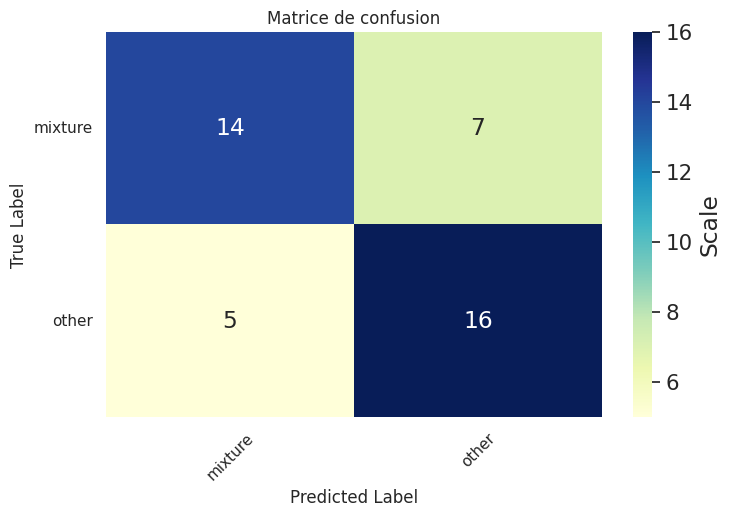

In [ ]:
import pickle
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
# Création d'un jeu d'apprentissage et de test
trainsize=0.9 # 70% pour le jeu d'apprentissage, il reste 30% du jeu de données pour
testsize= 0.1
seed=30
train_title,test_title,train_note,test_note=train_test_split(X_train,y_train, train_size=trainsize,random_state=seed,test_size=testsize,stratify=y_train)

pipeline=Pipeline([
    ("cleaner", TextNormalizer(removedigit=True, getlemmatisation=False)),
    ("tfidf", TfidfVectorizer(lowercase=False, stop_words='english')),
    ('mnb', MultinomialNB(alpha=0.5, fit_prior=True, force_alpha=True))
])
pipeline.fit(train_title,train_note)
filename='./Modele/TruevsFalsevsMixturevsOther/Mnb_final_4_step2.pkl'
print("Sauvegarde du modèle dans ", filename)
pickle.dump(pipeline, open(filename, "wb"))



print ("Chargement du modèle \n")
# le chargement se fait via la fonction load
clf_loaded = pickle.load(open(filename, 'rb'))
# affichage du modèle sauvegardé
print (clf_loaded)


# test  avec les données qu'il a apprise c'est parfait woahhha c'est beau
y_pred = clf_loaded.predict(test_title)
# autres mesures et matrice de confusion
MyshowAllScores(test_note,y_pred)



---



Recherche du meilleure modèle pour la seconde classification sur True vs False avec les données classé  pour  true/false


---



In [ ]:
mySample2 = mySample.loc[~mySample['our rating'].isin(["other","mixture"])]
print(mySample2['our rating'].value_counts())
X_train = mySample2['text']
y_train = mySample2['our rating']

false    210
true     210
Name: our rating, dtype: int64


[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Evaluation de  MultinomialNB
MultinomialNB : 0.721 (0.081) in 0.470 s
Evaluation de  LR
LR : 0.738 (0.064) in 3.343 s
Evaluation de  KNN
KNN : 0.655 (0.067) in 3.310 s
Evaluation de  CART
CART : 0.662 (0.061) in 3.646 s
Evaluation de  RF
RF : 0.710 (0.077) in 6.557 s
Evaluation de  SVM
SVM : 0.757 (0.059) in 19.468 s

Le meilleur resultat : 
Classifier :  SVM  accuracy : 0.757  (0.059)  en 19.468   s

Tous les résultats : 

Classifier :  SVM  accuracy : 0.757  (0.059)  en 19.468   s
Classifier :  LR  accuracy : 0.738  (0.064)  en 3.343   s
Classifier :  MultinomialNB  accuracy : 0.721  (0.081)  en 0.470   s
Classifier :  RF  accuracy : 0.710  (0.077)  en 6.557   s
Classifier :  CART  accuracy : 0.662  (0.061)  en 3.646   s
Classifier :  KNN  accuracy : 0.655  (0.067)  en 3.310   s


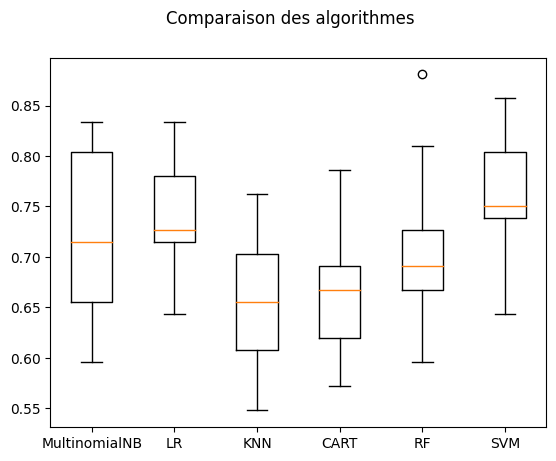

In [ ]:
testAllModel(X_train,y_train,3)

In [ ]:
testSVC(X_train, y_train,3,"./Data_parametrage/data_svm_mat_4_3")

Application de gridsearch ...
pipeline : ['cleaner', 'tfidf', 'svm']
parameters :
{'cleaner__removedigit': [True, False], 'cleaner__getlemmatisation': [True, False], 'tfidf__stop_words': ['english', None], 'tfidf__lowercase': [True, False], 'svm__C': [0.001, 0.01, 0.1, 1, 10], 'svm__gamma': [0.001, 0.01, 0.1, 1], 'svm__kernel': ['linear', 'rbf', 'poly', 'sigmoid']}
Fitting 3 folds for each of 1280 candidates, totalling 3840 fits


[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


réalisé en  520.696 s
Meilleur résultat : 0.760
Ensemble des meilleurs paramètres :
	cleaner__getlemmatisation: False
	cleaner__removedigit: False
	svm__C: 1
	svm__gamma: 1
	svm__kernel: 'sigmoid'
	tfidf__lowercase: False
	tfidf__stop_words: 'english'

Les premiers résultats : 
       cleaner__getlemmatisation  cleaner__removedigit  svm__C  svm__gamma  \
1214                      False                 False     1.0        1.00   
886                       False                  True     1.0        1.00   
894                       False                  True     1.0        1.00   
1170                      False                 False     1.0        0.01   
1262                      False                 False    10.0        0.10   

     svm__kernel  tfidf__lowercase tfidf__stop_words  accuracy  
1214     sigmoid             False           english  0.759524  
886          rbf             False           english  0.757143  
894      sigmoid             False           english  0.757143

Sauvegarde du modèle dans  ./Modele/final/Svm_final_4_step3.pkl
Chargement du modèle 

Pipeline(steps=[('cleaner', TextNormalizer()),
                ('tfidf',
                 TfidfVectorizer(lowercase=False, stop_words='english')),
                ('svm', SVC(C=1, gamma=1, kernel='sigmoid'))])
Accuracy : 0.738
Classification Report
              precision    recall  f1-score   support

       false    0.77778   0.66667   0.71795        21
        true    0.70833   0.80952   0.75556        21

    accuracy                        0.73810        42
   macro avg    0.74306   0.73810   0.73675        42
weighted avg    0.74306   0.73810   0.73675        42



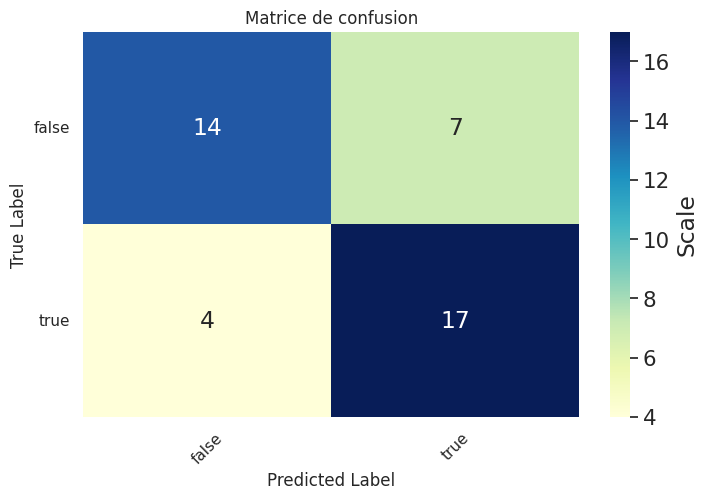

In [ ]:
from sklearn.model_selection import train_test_split
import pickle
# Création d'un jeu d'apprentissage et de test
trainsize=0.9 # 70% pour le jeu d'apprentissage, il reste 30% du jeu de données pour
testsize= 0.1
seed=30

train_title,test_title,train_note,test_note=train_test_split(X_train,y_train, train_size=trainsize,random_state=seed,test_size=testsize,stratify=y_train)

pipeline=Pipeline([
    ("cleaner", TextNormalizer(removedigit=False, getlemmatisation=False)),
    ("tfidf", TfidfVectorizer(lowercase=False, stop_words='english')),
    ('svm', SVC(C=1, gamma=1, kernel='sigmoid'))
])
pipeline.fit(train_title,train_note)
filename='./Modele/TruevsFalsevsMixturevsOther/Svm_final_4_step3.pkl'
print("Sauvegarde du modèle dans ", filename)
pickle.dump(pipeline, open(filename, "wb"))


print ("Chargement du modèle \n")
# le chargement se fait via la fonction load
clf_loaded = pickle.load(open(filename, 'rb'))
# affichage du modèle sauvegardé
print (clf_loaded)


# test  avec les données qu'il a apprise c'est parfait woahhha c'est beau
y_pred = clf_loaded.predict(test_title)
# autres mesures et matrice de confusion
MyshowAllScores(test_note,y_pred)

In [ ]:
testLR(X_train, y_train,3,"./Data_parametrage/data_lr_mat_4_3")

Application de gridsearch ...
pipeline : ['cleaner', 'tfidf', 'lr']
parameters :
{'cleaner__removedigit': [True, False], 'cleaner__getlemmatisation': [True, False], 'tfidf__stop_words': ['english', None], 'tfidf__lowercase': [True, False], 'lr__solver': ['newton-cg', 'lbfgs', 'liblinear'], 'lr__penalty': ['l2'], 'lr__C': [100, 10, 1.0, 0.1, 0.01]}
Fitting 3 folds for each of 240 candidates, totalling 720 fits
réalisé en  88.065 s
Meilleur résultat : 0.762
Ensemble des meilleurs paramètres :
	cleaner__getlemmatisation: False
	cleaner__removedigit: True
	lr__C: 10
	lr__penalty: 'l2'
	lr__solver: 'liblinear'
	tfidf__lowercase: False
	tfidf__stop_words: 'english'

Les premiers résultats : 
      cleaner__getlemmatisation  cleaner__removedigit  lr__C lr__penalty  \
142                      False                  True   10.0          l2   
134                      False                  True   10.0          l2   
138                      False                  True   10.0          l2   
22  

Sauvegarde du modèle dans  ./Modele/final/Lr_final_4_step3.pkl
Chargement du modèle 

Pipeline(steps=[('cleaner', TextNormalizer(removedigit=True)),
                ('tfidf',
                 TfidfVectorizer(lowercase=False, stop_words='english')),
                ('lr', LogisticRegression(C=10, solver='liblinear'))])
Accuracy : 0.738
Classification Report
              precision    recall  f1-score   support

       false    0.75000   0.71429   0.73171        21
        true    0.72727   0.76190   0.74419        21

    accuracy                        0.73810        42
   macro avg    0.73864   0.73810   0.73795        42
weighted avg    0.73864   0.73810   0.73795        42



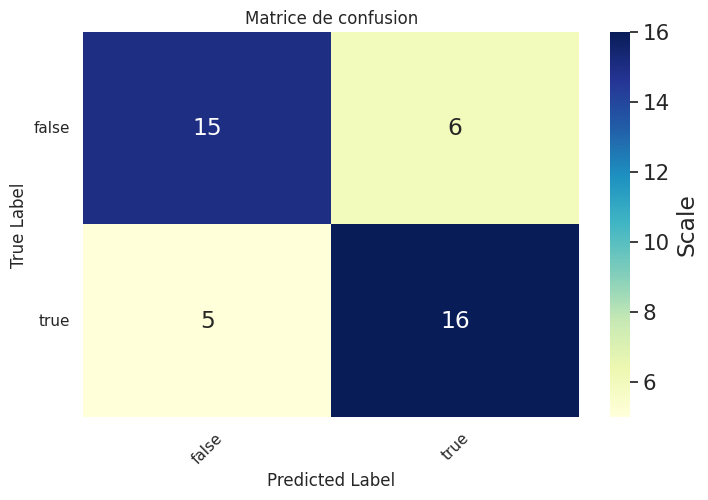

In [ ]:
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# Création d'un jeu d'apprentissage et de test
trainsize=0.9 # 70% pour le jeu d'apprentissage, il reste 30% du jeu de données pour
testsize= 0.1
seed=30
train_title,test_title,train_note,test_note=train_test_split(X_train,y_train, train_size=trainsize,random_state=seed,test_size=testsize,stratify=y_train)

pipeline=Pipeline([
    ("cleaner", TextNormalizer(removedigit=True, getlemmatisation=False)),
    ("tfidf", TfidfVectorizer(lowercase=False, stop_words='english')),
    ('lr', LogisticRegression(C=10,penalty='l2', solver='liblinear'))
])
pipeline.fit(train_title,train_note)
filename='./Modele/TruevsFalsevsMixturevsOther/Lr_final_4_step3.pkl'
print("Sauvegarde du modèle dans ", filename)
pickle.dump(pipeline, open(filename, "wb"))



print ("Chargement du modèle \n")
# le chargement se fait via la fonction load
clf_loaded = pickle.load(open(filename, 'rb'))
# affichage du modèle sauvegardé
print (clf_loaded)


# test  avec les données qu'il a apprise c'est parfait woahhha c'est beau
y_pred = clf_loaded.predict(test_title)
# autres mesures et matrice de confusion
MyshowAllScores(test_note,y_pred)

In [ ]:
testMNB(X_train, y_train,3,"./Data_parametrage/data_mnb_mat_4_3")

Application de gridsearch ...
pipeline : ['cleaner', 'tfidf', 'mnb']
parameters :
{'cleaner__removedigit': [True, False], 'cleaner__getlemmatisation': [True, False], 'tfidf__stop_words': ['english', None], 'tfidf__lowercase': [True, False], 'mnb__alpha': array([0.5, 0.7, 0.9, 1.1, 1.3, 1.5]), 'mnb__fit_prior': [True, False], 'mnb__force_alpha': [True, False]}
Fitting 3 folds for each of 384 candidates, totalling 1152 fits
réalisé en  137.809 s
Meilleur résultat : 0.764
Ensemble des meilleurs paramètres :
	cleaner__getlemmatisation: False
	cleaner__removedigit: True
	mnb__alpha: 1.3
	mnb__fit_prior: True
	mnb__force_alpha: True
	tfidf__lowercase: True
	tfidf__stop_words: 'english'

Les premiers résultats : 
      cleaner__getlemmatisation  cleaner__removedigit  mnb__alpha  \
268                      False                  True         1.3   
264                      False                  True         1.3   
260                      False                  True         1.3   
256        

Sauvegarde du modèle dans  ./Modele/final/Mnb_final_4_step3.pkl
Chargement du modèle 

Pipeline(steps=[('cleaner', TextNormalizer(removedigit=True)),
                ('tfidf', TfidfVectorizer(stop_words='english')),
                ('mnb',
                 MultinomialNB(alpha=1.3, fit_prior=False, force_alpha=False))])
Accuracy : 0.762
Classification Report
              precision    recall  f1-score   support

       false    0.82353   0.66667   0.73684        21
        true    0.72000   0.85714   0.78261        21

    accuracy                        0.76190        42
   macro avg    0.77176   0.76190   0.75973        42
weighted avg    0.77176   0.76190   0.75973        42



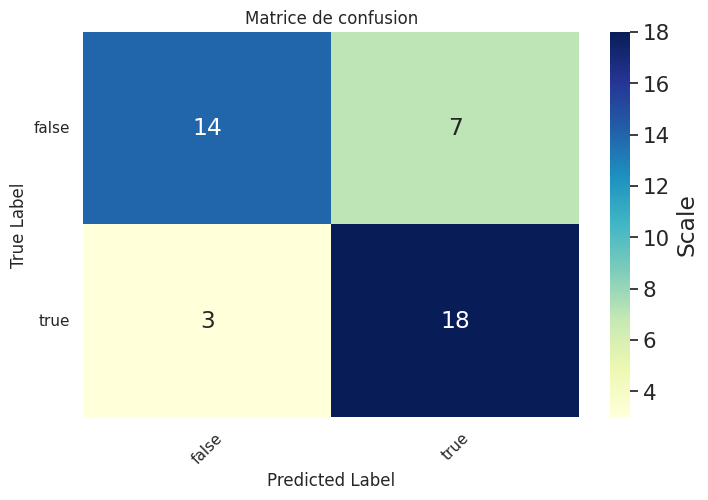

In [ ]:
import pickle
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
# Création d'un jeu d'apprentissage et de test
trainsize=0.9 # 70% pour le jeu d'apprentissage, il reste 30% du jeu de données pour
testsize= 0.1
seed=30
train_title,test_title,train_note,test_note=train_test_split(X_train,y_train, train_size=trainsize,random_state=seed,test_size=testsize,stratify=y_train)

pipeline=Pipeline([
    ("cleaner", TextNormalizer(removedigit=True, getlemmatisation=False)),
    ("tfidf", TfidfVectorizer(lowercase=True, stop_words='english')),
    ('mnb', MultinomialNB(alpha=1.3, fit_prior=False, force_alpha=False))
])
pipeline.fit(train_title,train_note)
filename='./Modele/TruevsFalsevsMixturevsOther/Mnb_final_4_step3.pkl'
print("Sauvegarde du modèle dans ", filename)
pickle.dump(pipeline, open(filename, "wb"))



print ("Chargement du modèle \n")
# le chargement se fait via la fonction load
clf_loaded = pickle.load(open(filename, 'rb'))
# affichage du modèle sauvegardé
print (clf_loaded)


# test  avec les données qu'il a apprise c'est parfait woahhha c'est beau
y_pred = clf_loaded.predict(test_title)
# autres mesures et matrice de confusion
MyshowAllScores(test_note,y_pred)

In [ ]:
testRFC(X_train, y_train,3,"./Data_parametrage/data_rfc_mat_4_3")

Application de gridsearch ...
pipeline : ['cleaner', 'tfidf', 'rfc']
parameters :
{'cleaner__removedigit': [True, False], 'cleaner__getlemmatisation': [True, False], 'tfidf__stop_words': ['english', None], 'tfidf__lowercase': [True, False], 'rfc__n_estimators': [500, 1200], 'rfc__max_depth': [25, 30], 'rfc__min_samples_split': [5, 10, 15], 'rfc__min_samples_leaf': [1, 2]}
Fitting 3 folds for each of 384 candidates, totalling 1152 fits
réalisé en  276.001 s
Meilleur résultat : 0.752
Ensemble des meilleurs paramètres :
	cleaner__getlemmatisation: True
	cleaner__removedigit: True
	rfc__max_depth: 25
	rfc__min_samples_leaf: 1
	rfc__min_samples_split: 15
	rfc__n_estimators: 500
	tfidf__lowercase: False
	tfidf__stop_words: 'english'

Les premiers résultats : 
      cleaner__getlemmatisation  cleaner__removedigit  rfc__max_depth  \
197                      False                  True              25   
18                        True                  True              25   
69                 

Sauvegarde du modèle dans  ./Modele/final/Rfc_final_4_step3.pkl
Chargement du modèle 

Pipeline(steps=[('cleaner', TextNormalizer(removedigit=True)),
                ('tfidf', TfidfVectorizer()),
                ('rfc',
                 RandomForestClassifier(max_depth=25, min_samples_split=5,
                                        n_estimators=1200))])
Accuracy : 0.619
Classification Report
              precision    recall  f1-score   support

       false    0.63158   0.57143   0.60000        21
        true    0.60870   0.66667   0.63636        21

    accuracy                        0.61905        42
   macro avg    0.62014   0.61905   0.61818        42
weighted avg    0.62014   0.61905   0.61818        42



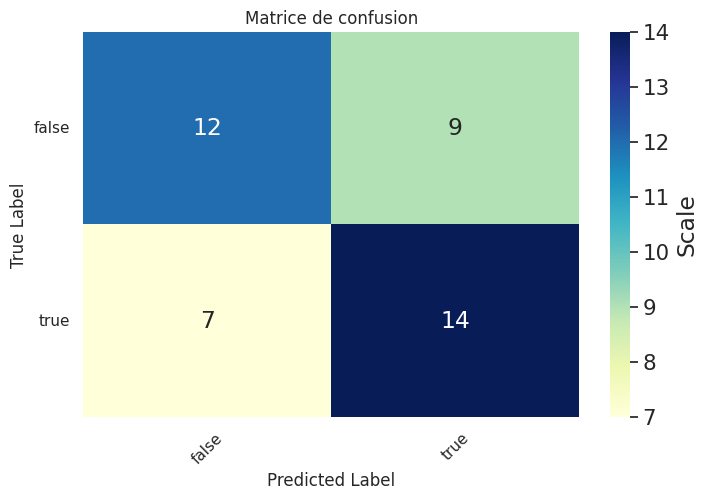

In [ ]:
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
# Création d'un jeu d'apprentissage et de test
trainsize=0.9 # 70% pour le jeu d'apprentissage, il reste 30% du jeu de données pour
testsize= 0.1
seed=30
train_title,test_title,train_note,test_note=train_test_split(X_train,y_train, train_size=trainsize,random_state=seed,test_size=testsize,stratify=y_train)  # stratified = yes

## double classification a regarder
pipeline=Pipeline([
    ("cleaner", TextNormalizer(removedigit=True, getlemmatisation=False)),
    ("tfidf", TfidfVectorizer(lowercase=True, stop_words=None)),
    ('rfc', RandomForestClassifier(max_depth=25,min_samples_leaf=1, min_samples_split=5, n_estimators=1200))
])
pipeline.fit(train_title,train_note)
filename='./Modele/TruevsFalsevsMixturevsOther/Rfc_final_4_step3.pkl'
print("Sauvegarde du modèle dans ", filename)
pickle.dump(pipeline, open(filename, "wb"))



print ("Chargement du modèle \n")
# le chargement se fait via la fonction load
clf_loaded = pickle.load(open(filename, 'rb'))
# affichage du modèle sauvegardé
print (clf_loaded)


# test  avec les données qu'il a apprise c'est parfait woahhha c'est beau
y_pred = clf_loaded.predict(test_title)
# autres mesures et matrice de confusion
MyshowAllScores(test_note,y_pred)



---


-> Etape 4 : mise en forme de la double classification


---





<ipython-input-33-39e2c058e94e>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mySample['notation'][i] = 'false/true'
<ipython-input-33-39e2c058e94e>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mySample['notation'][i] = 'other/mixture'


Accuracy : 0.500
Classification Report
              precision    recall  f1-score   support

       false    0.50000   0.57143   0.53333        21
     mixture    0.43750   0.33333   0.37838        21
       other    0.61111   0.52381   0.56410        21
        true    0.46154   0.57143   0.51064        21

    accuracy                        0.50000        84
   macro avg    0.50254   0.50000   0.49661        84
weighted avg    0.50254   0.50000   0.49661        84



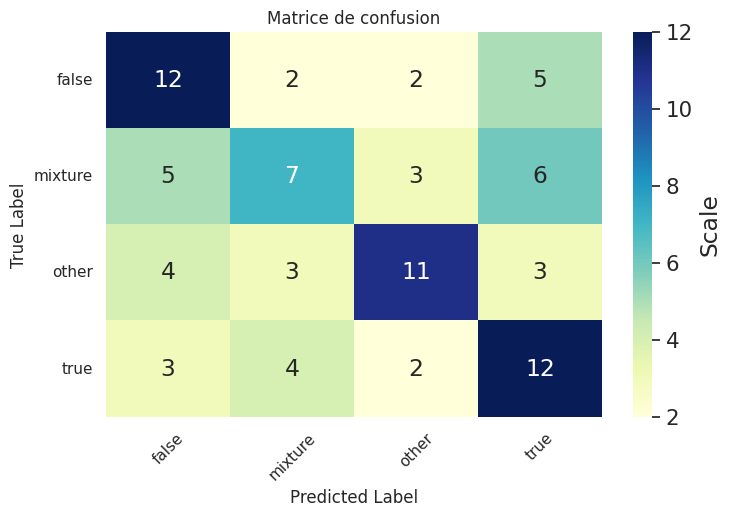

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

mySample = pd.read_csv('./Data_equilibre/MyData_Sprint1et2.csv', sep=",")

mySample['notation'] = mySample['our rating']

for i in range(0,len(mySample['notation'])):
     if mySample['notation'][i] == 'false' or mySample['notation'][i] == 'true':
         mySample['notation'][i] = 'false/true'
     if mySample['notation'][i] == 'other' or mySample['notation'][i] == 'mixture':
         mySample['notation'][i] = 'other/mixture'



# print(mySample['notation'].value_counts())

X_train = mySample['text']
y_train = mySample['notation']
z_train = mySample['our rating']

trainsize=0.9 
testsize= 0.1
seed=30

train_title,test_title,train_note,test_note,train_rating,test_rating=train_test_split(X_train,y_train,z_train, train_size=trainsize,random_state=seed,test_size=testsize,stratify=z_train)

new_class_data0 = pd.DataFrame(np.column_stack((train_title, train_note,train_rating)), columns=['text','note','our rating'])
# on recupere le True et False dans classif1
classif1 = new_class_data0.loc[~new_class_data0['our rating'].isin(["other","mixture"])]
# on recupere le Mixture et Other dans classif2
classif2 = new_class_data0.loc[~new_class_data0['our rating'].isin(["true","false"])]

#  premièere classification
pipeline0=Pipeline([
    ("cleaner", TextNormalizer(removedigit=True, getlemmatisation=False)),
    ("tfidf", TfidfVectorizer(lowercase=True, stop_words=None)),
    ('lr', LogisticRegression(C=100,penalty='l2', solver='newton-cg'))
])

pipeline0.fit(train_title,train_note)

#  seconde classification pour True vs False
pipeline1=Pipeline([
    ("cleaner", TextNormalizer(removedigit=True, getlemmatisation=False)),
    ("tfidf", TfidfVectorizer(lowercase=True, stop_words='english')),
    ('mnb', MultinomialNB(alpha=1.3, fit_prior=False, force_alpha=False))
])

pipeline1.fit(classif1['text'],classif1['our rating'])

#  seconde classification pour Mixture vs Other
pipeline2=Pipeline([
    ("cleaner", TextNormalizer(removedigit=False, getlemmatisation=True)),
    ("tfidf", TfidfVectorizer(lowercase=True, stop_words=None)),
    ('rfc', RandomForestClassifier(max_depth=25,min_samples_leaf=2, min_samples_split=15, n_estimators=500))
])

pipeline2.fit(classif2['text'],classif2['our rating'])





# test  0
y_pred0 = pipeline0.predict(test_title)
# MyshowAllScores(test_note,y_pred0)

predictions_df = pd.DataFrame({'predictions': y_pred0})

new_class_data = pd.DataFrame(np.column_stack((test_title, y_pred0,test_note,test_rating)), columns=['text', 'predictions','note','our rating'])


# on recupere le True et False dans classif1
classif1_test = new_class_data.loc[~new_class_data['predictions'].isin(['other/mixture'])]
# on recupere le Mixture et Other dans classif2
classif2_test = new_class_data.loc[~new_class_data['predictions'].isin(['false/true'])]


# test  1
y_pred1 = pipeline1.predict(classif1_test['text'])
# autres mesures et matrice de confusion
# MyshowAllScores(classif1_test['our rating'],y_pred1)

classif1_test = classif1_test.assign(resultat=y_pred1)

# test  2
y_pred2 = pipeline2.predict(classif2_test['text'])
# autres mesures et matrice de confusion
# MyshowAllScores(classif2_test['our rating'],y_pred2)

classif2_test = classif2_test.assign(resultat=y_pred2)

data_final = pd.concat([classif1_test,classif2_test], ignore_index = True)


MyshowAllScores(data_final['our rating'],data_final['resultat'])



Malgré la double classification, les résultats ne sont pas à la hauteur de nos espérances. En effet même si pris séparément les modèles sont relativement correct, l'enchaînement des pipelines crée un effet d'accumulation des erreurs.